In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import jax

from src.simulate_trace import MakePulse, apply_noise, GaussianAmplitude, PolynomialPhase, MultiPulse


/home/tillstehling/miniconda3/lib/python3.11/site-packages/refractiveindex/refractiveindex.py:300: RuntimeWarning: invalid value encountered in sqrt
  n = np.sqrt(nsq)


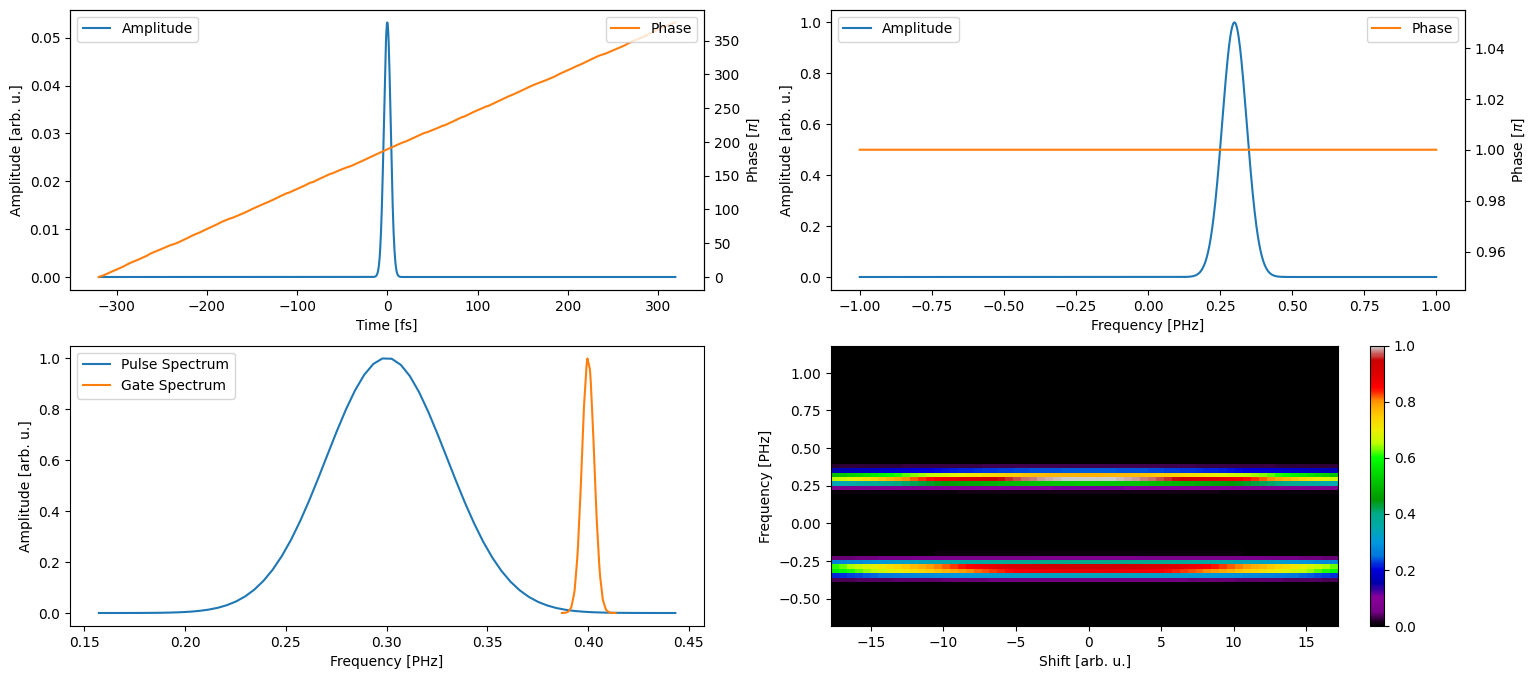

In [37]:

pulse_maker = MakePulse(N=128*10, Delta_f=1)

central_f = np.array([0.3])
phase = PolynomialPhase(central_frequency = central_f, coefficients = np.array([0.5, 0, 0]))
amp = GaussianAmplitude(central_frequency = central_f, amplitude = np.array([1.0]), fwhm = np.array([0.1]))
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))

input_pulses = pulse_maker.pulses



central_f = np.array([0.4])
phase = PolynomialPhase(central_frequency=central_f, coefficients = np.zeros(3))
amp = GaussianAmplitude(central_frequency = central_f, amplitude = np.array([1.0]), fwhm = np.array([0.01]))
_, _, frequency_gate, pulse_f_gate = pulse_maker.generate_pulse((amp, phase))


delay, frequency, trace, spectra=pulse_maker.generate_vampire(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "pg", cross_correlation=True,
                                                          gate=(frequency_gate, pulse_f_gate), real_fields=True,
                                                          N=64, scale_time_range=0.25, plot_stuff=True, cut_off_val=0.001, frequency_range=(0, 0.5))

In [31]:
pulse_maker = MakePulse(N=128*10, Delta_f=1)

central_f = np.array([0.3])
phase = PolynomialPhase(central_frequency = central_f, coefficients = np.array([0.5, 0, 0, 0]))
amp = GaussianAmplitude(central_frequency = central_f, amplitude = np.array([1.0]), fwhm = np.array([0.1]))
pulse = (amp, phase)

# central_f = np.array([0.3, 0.3])
# phase1 = PolynomialPhase(central_frequency = central_f[0], coefficients = np.array([0.5, 0, -100]))
# phase2 = PolynomialPhase(central_frequency = central_f[1], coefficients = np.array([0.5, 0, 100]))
# pulse = MultiPulse(delay=np.array([100]), duration=np.array([10,10]), central_frequency=central_f, amplitude=np.array([1,1]), phase=[phase, phase])
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse(pulse)


# central_f = np.array([0.51])
# phase = PolynomialPhase(central_frequency = central_f, coefficients = np.zeros(3))
# amp = GaussianAmplitude(central_frequency = central_f, amplitude = np.array([1.0]), fwhm = np.array([0.1]))
# time_gate, pulse_t_gate, frequency_gate, pulse_f_gate = pulse_maker.generate_pulse((amp, phase))

/home/tillstehling/miniconda3/lib/python3.11/site-packages/refractiveindex/refractiveindex.py:300: RuntimeWarning: invalid value encountered in sqrt
  n = np.sqrt(nsq)


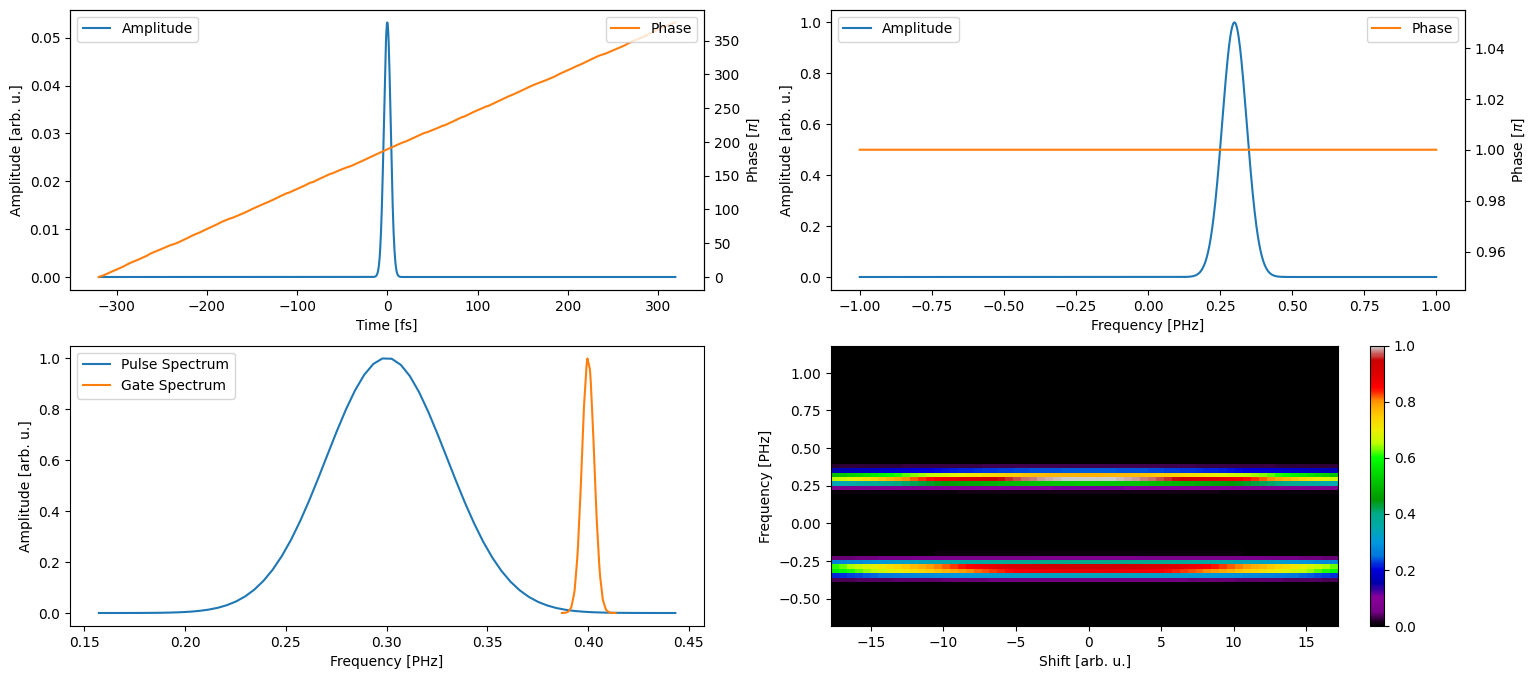

In [38]:
time, frequency, trace, spectra=pulse_maker.generate_vampire(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, nonlinear_method="pg",
                                                          scale_time_range=0.25, N=64, cross_correlation=True, 
                                                          gate=(frequency_gate, pulse_f_gate),
                                                          interpolate_fft_conform=True, 
                                                          cut_off_val=0.001, real_fields=True, material_thickness=0, tau_interferometer=0, frequency_range=(0, 0.5))

In [32]:
from src.real_fields import vampire

In [39]:
lsf = vampire.LSF(time, frequency, trace, "pg", f_range_fields=(0,0.5), cross_correlation=True)
lsf.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")
lsf.use_measured_spectrum(spectra.gate[0], spectra.gate[1], "gate")

lsf.get_gate_pulse(frequency_gate, pulse_f_gate)


population = lsf.create_initial_population(population_size=5, amp_type="gaussian", phase_type="sinusoidal", no_funcs_amp=5, no_funcs_phase=5)

lsf.random_direction_mode="continuous"
lsf.no_points_for_continuous = 10

final_result=lsf.run(population, 5)

/home/tillstehling/miniconda3/lib/python3.11/site-packages/refractiveindex/refractiveindex.py:297: RuntimeWarning: invalid value encountered in divide
  g = lambda c1, c2, w: c1 * (w ** 2) / (w ** 2 - c2 ** 2)


LSF is only implemented for amp_type=discrete, phase_type=discrete and converts the populations accordingly.
(19,)
(19,) (1,) (1,)


IndexError: Cannot do a non-empty jnp.take() from an empty axis.

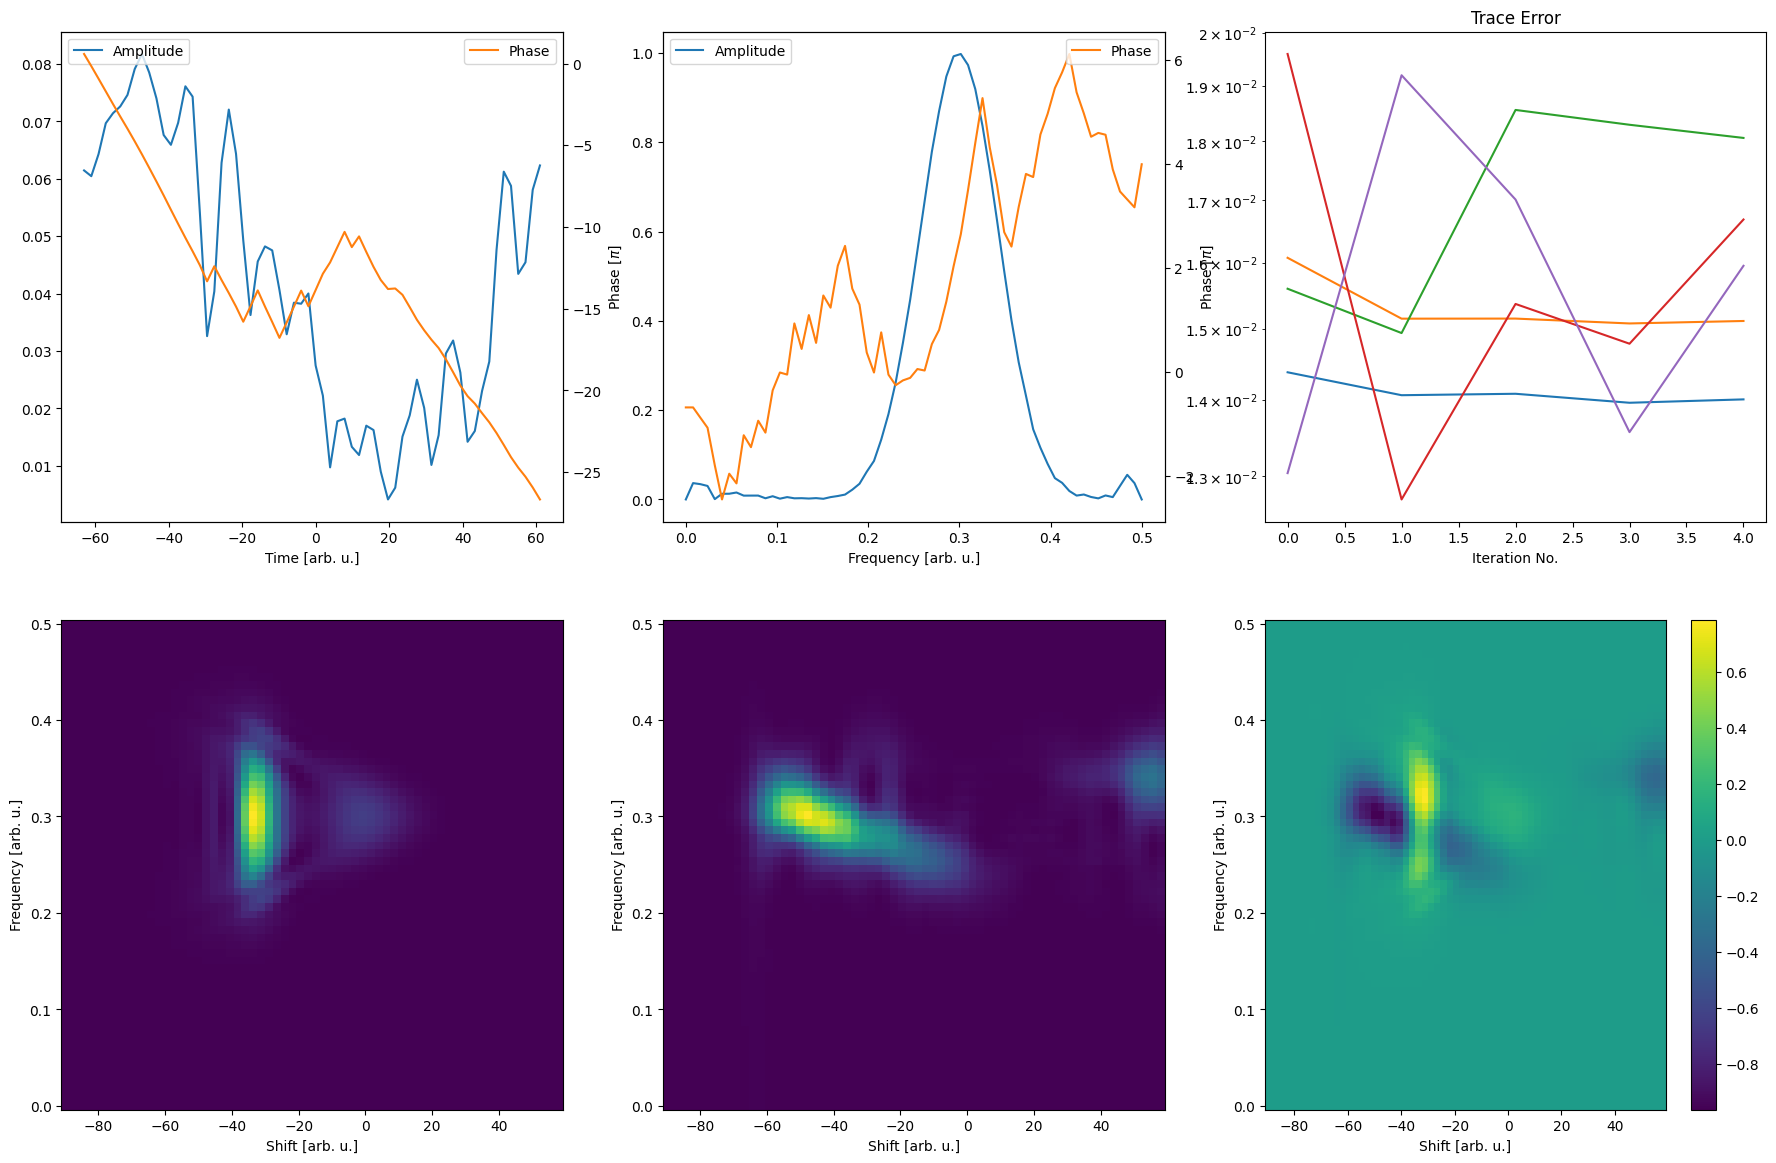

In [39]:
lsf.plot_results(final_result)

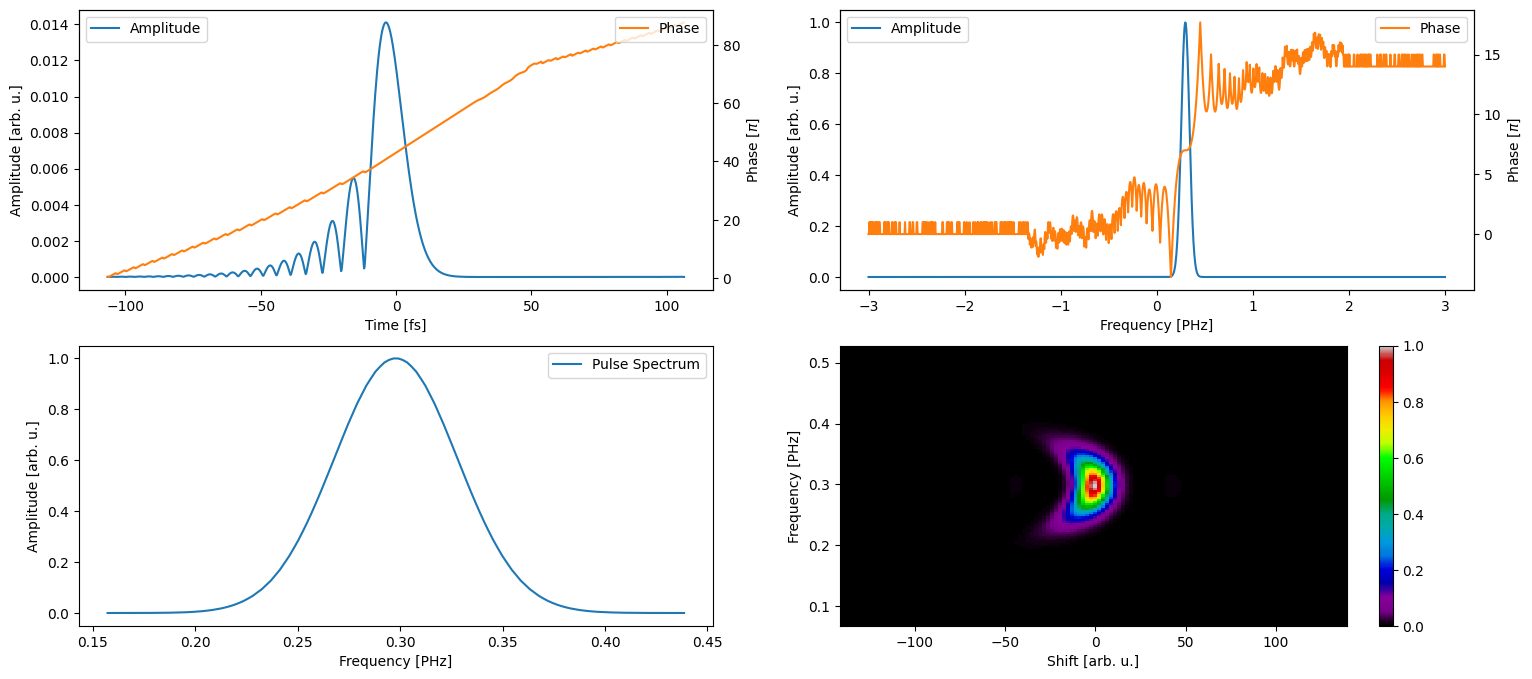

In [ ]:
from src import spectral_filter_funcs
from src.utilities import do_interpolation_1d

spectral_filter = spectral_filter_funcs.get_filter("multi", frequency_inp, (("lorentzian", 1, 0.29, 0.01),
                                                                            ("lorentzian", 1, 0.31, 0.01)))

time, frequency, trace, spectra=pulse_maker.generate_tdp(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, nonlinear_method="pg", spectral_filter=spectral_filter, 
                                                          scale_time_range=5, N=128, cross_correlation=False, 
                                                          gate=(frequency_gate, pulse_f_gate),
                                                          interpolate_fft_conform=True, 
                                                          cut_off_val=1e-2, ifrog=False, real_fields=False)#, frequency_range=(-0.5, 0.5))

#trace = apply_noise(trace, scale_val=(0.05, 0.05), additive_noise=True, multiplicative_noise=True)

spectral_filter = do_interpolation_1d(frequency, frequency_inp, spectral_filter)

In [5]:
from src.tdp import GeneralizedProjection, PtychographicIterativeEngine, COPRA
from src.tdp import DifferentialEvolution, Evosax, LSF, AutoDiff

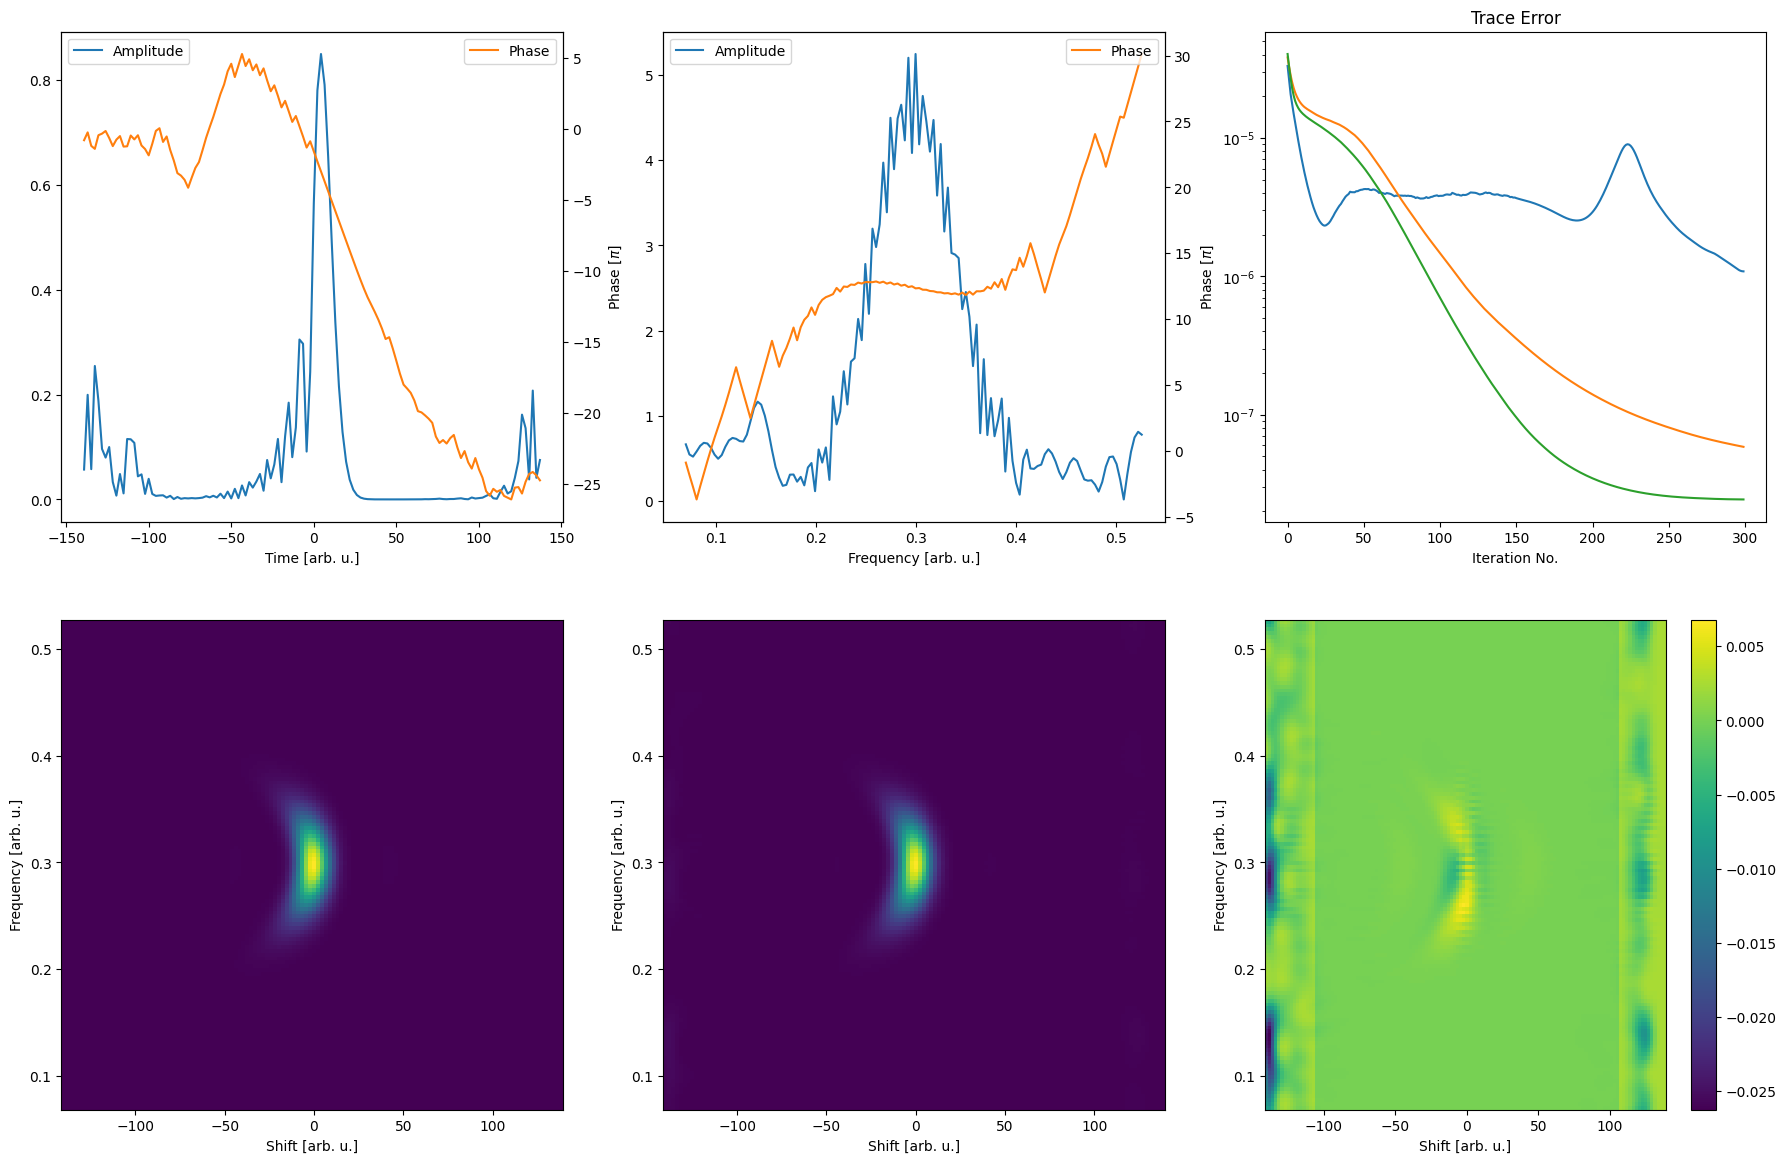

In [ ]:
# gp = GeneralizedProjection(time, frequency, trace, "pg", cross_correlation=False, spectral_filter=spectral_filter)
# population = gp.create_initial_population(population_size=3, guess_type="random")


# # gp.global_newton = "full"
# #gp.conjugate_gradients = "average"
# # gp.linalg_solver = "lineax"

# gp.global_gamma = -1e3

# #gp.global_adaptive_scaling = "linear"

# gp.no_steps_descent = 15
# # gp.max_steps_linesearch = 15
# # gp.use_linesearch = "zoom"
# # gp.global_gamma = 1.0
# # gp.delta_gamma = 2.0
# # gp.c1 = 1e-4
# # gp.c2 = 0.5

# # gp.lbfgs_memory = 3

# # gp.use_copra_style_step_scaling = False


# final_result = gp.run(population, 15)
# gp.plot_results(final_result)








# tdp = PtychographicIterativeEngine(time, frequency, trace, "pg", cross_correlation=False, pie_method="rPIE", 
#                                    spectral_filter=spectral_filter)
# population = tdp.create_initial_population(population_size=3, guess_type="random")


# tdp.alpha = 0.1
# tdp.local_gamma = 0.01
# tdp.global_gamma = 0.01

# # tdp.lbfgs_memory = 15
# # tdp.conjugate_gradients = False#"fletcher_reeves"

# # tdp.local_newton = "diagonal" #"lbfgs"
# # # tdp.use_linesearch = "backtracking" #"wolfe"
# # # #tdp.lambda_lm = 1e-2

# # tdp.r_local_method = "iteration"
# # tdp.r_gradient = "amplitude"
# # tdp.r_newton = True
# # tdp.r_no_iterations = 2

# final_result = tdp.run(population, 150, 150)
# tdp.plot_results(final_result)







# copra = COPRA(time, frequency, trace, "pg", cross_correlation=False, spectral_filter=spectral_filter)
# population = copra.create_initial_population(population_size=3, guess_type="random")


# # copra.use_linesearch = False #"wolfe"

# copra.local_gamma = 1
# copra.global_gamma = 0.5
# # copra.local_adaptive_scaling = "original"
# # copra.global_adaptive_scaling = "original"
# # copra.xi = 1e-1

# # copra.local_hessian=False
# # copra.global_hessian=False#"full"

# final_result = copra.run(population, 50, 50)
# copra.plot_results(final_result)




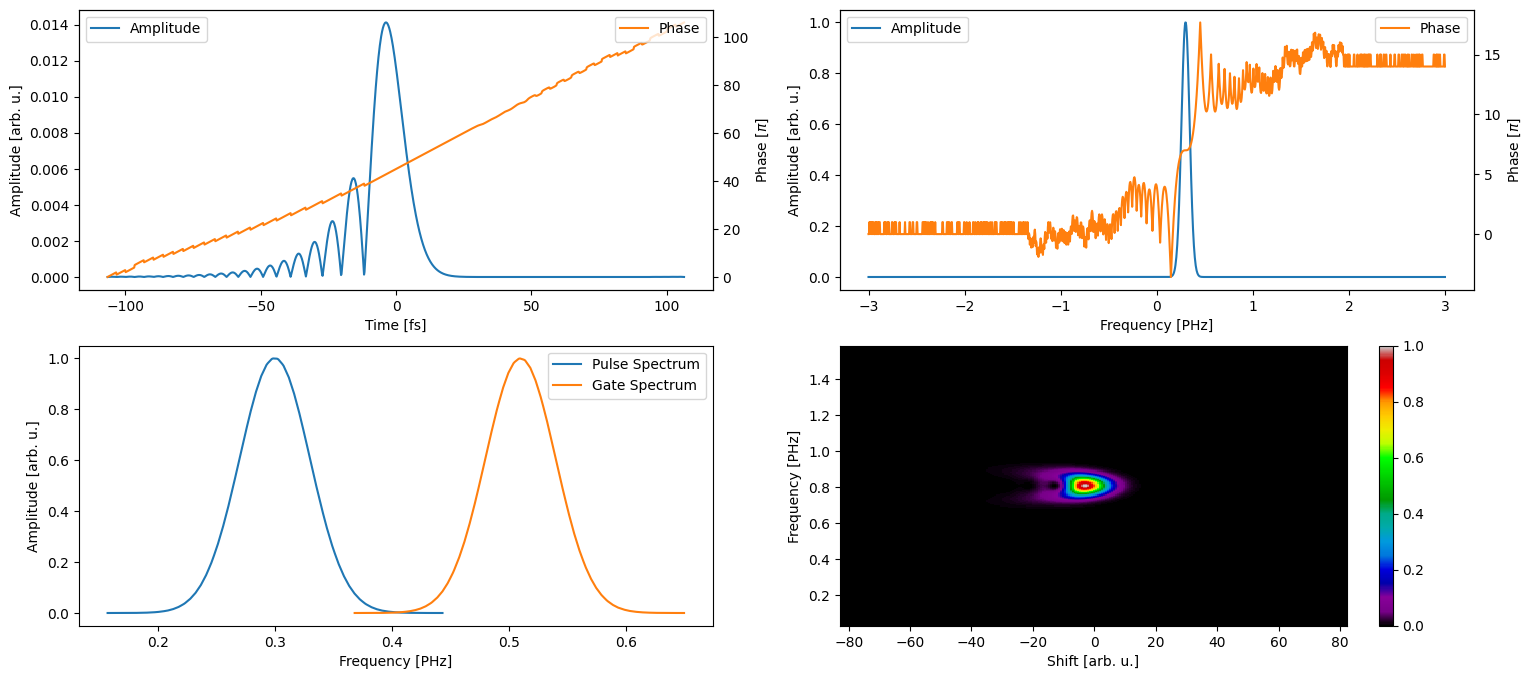

In [3]:
time, frequency, trace, spectra=pulse_maker.generate_frog(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, nonlinear_method="shg", 
                                                          scale_time_range=4, N=128*2, cross_correlation=True, 
                                                          gate=(frequency_gate, pulse_f_gate),
                                                          interpolate_fft_conform=True, 
                                                          cut_off_val=1e-2, ifrog=False, real_fields=False)#, frequency_range=(-0.5, 0.5))

#trace = apply_noise(trace, scale_val=(0.05, 0.05), additive_noise=True, multiplicative_noise=True)

In [5]:
from src.frog import CPCGPA

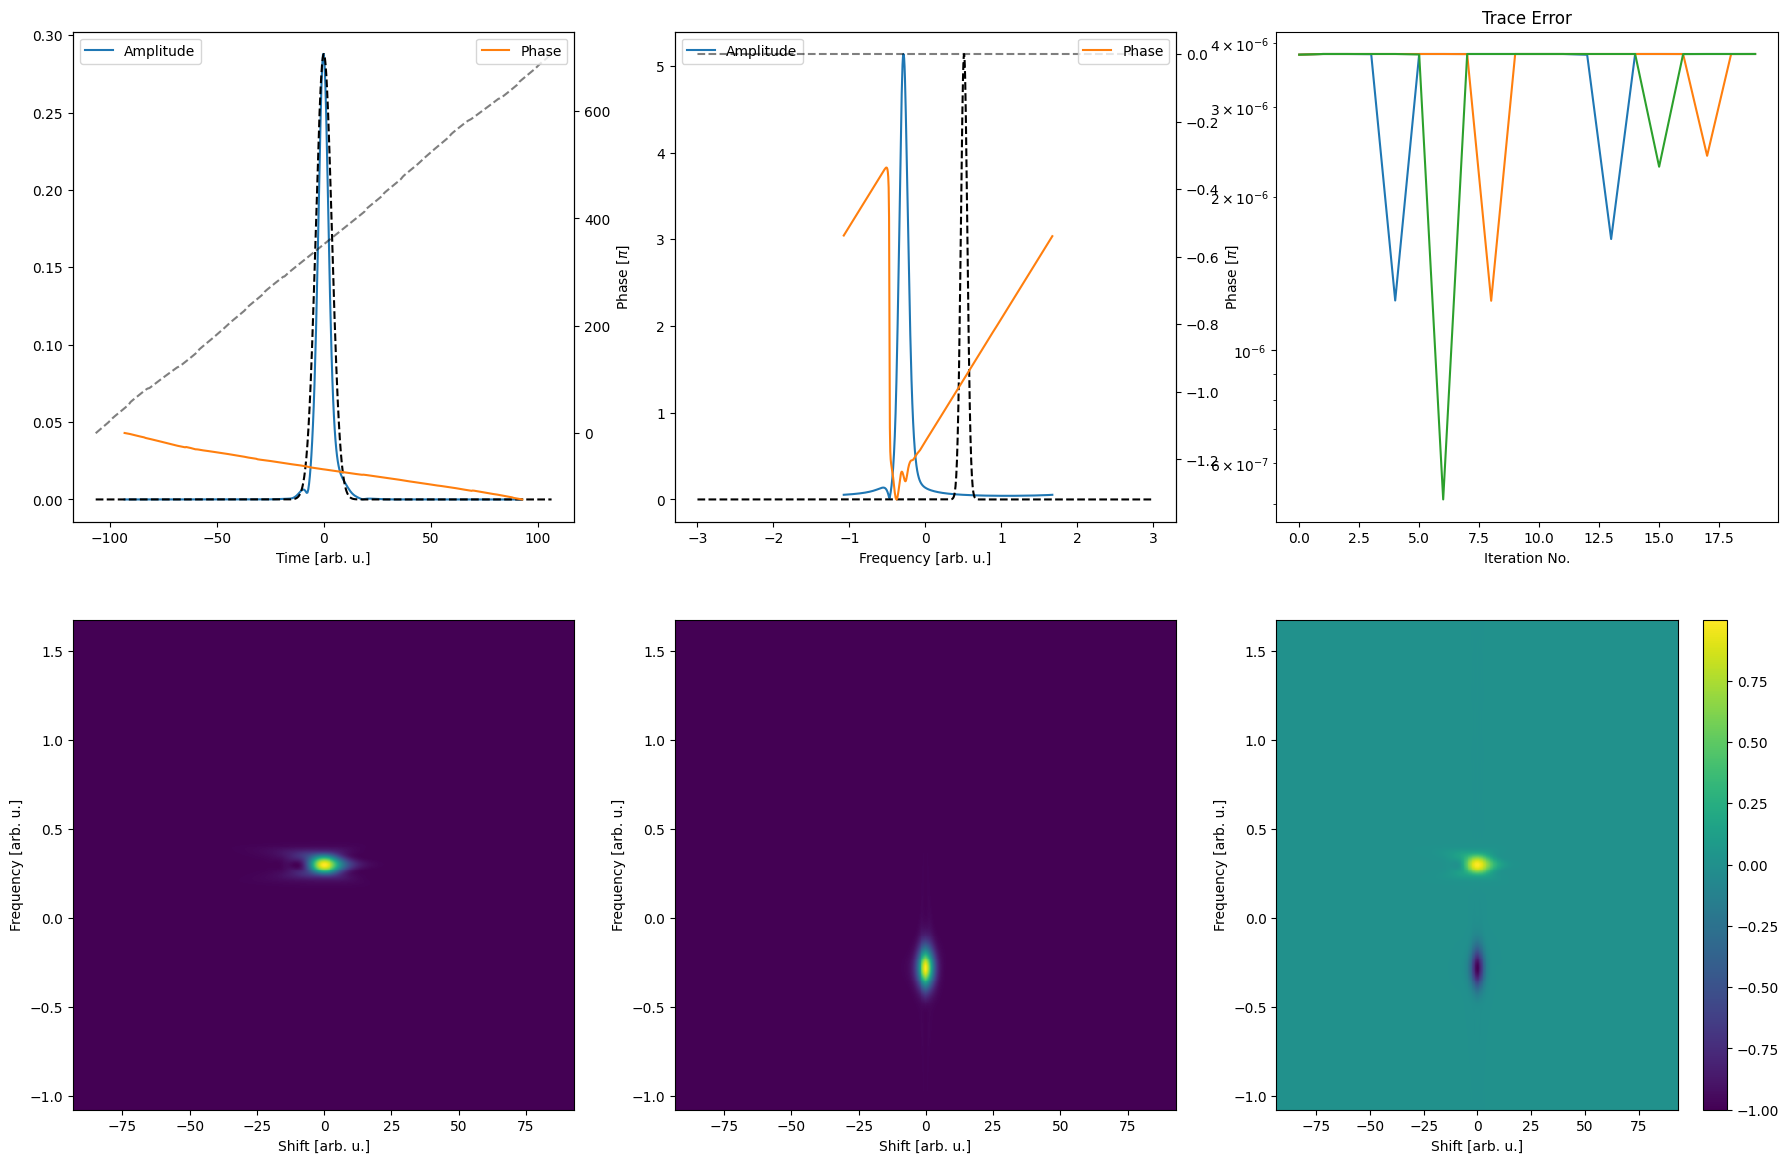

In [7]:
pcgpa = CPCGPA(time, frequency, trace, "sd", cross_correlation=False)
#pcgpa.get_gate_pulse(frequency_gate, pulse_f_gate)

population = pcgpa.create_initial_population(3, "random")

# pcgpa.constraints = True
pcgpa.svd = True

final_result = pcgpa.run(population, 20)
pcgpa.plot_results(final_result, pulse_maker.pulses, doubleblind=False)

In [ ]:
from src.utilities import get_score_values

In [ ]:
population_ideal = pcgpa.descent_state.population

In [ ]:
get_score_values(final_result, input_pulses=pulse_maker.pulses)

(Array(0.10108316, dtype=float32),
 Array(0.12546164, dtype=float32),
 Array(0.61608315, dtype=float32),
 Array(1.0705388, dtype=float32))

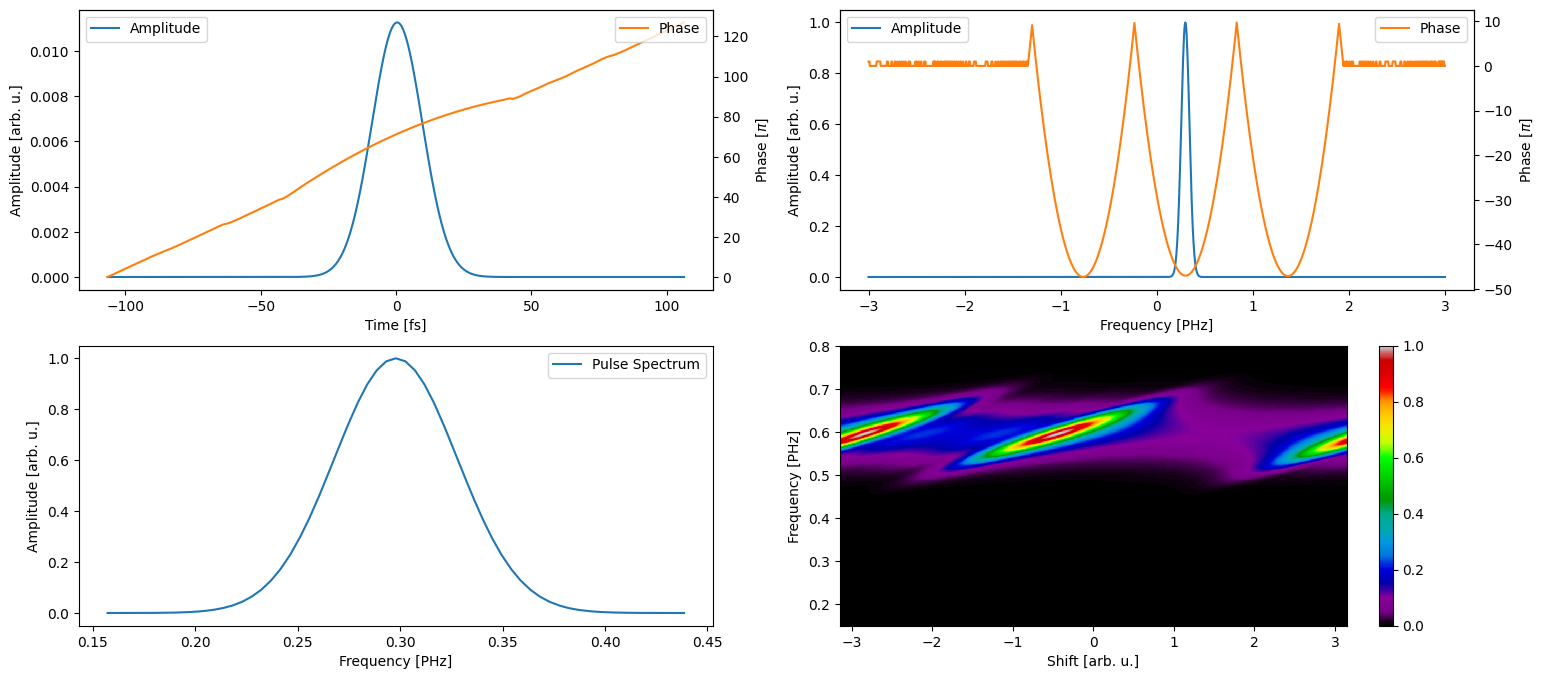

In [ ]:
#from phase_matrix_funcs import parameters_material_scan as parameters, calculate_phase_matrix_miips as phase_matrix_func

pulse_maker = MakePulse(N=128*10, Delta_f=3)

central_f = np.array([0.3])
phase = PolynomialPhase(central_frequency = central_f, coefficients = np.array([0.5, 0, 100, 0]))
amp = GaussianAmplitude(central_frequency = central_f, amplitude = np.array([1.0]), fwhm = np.array([0.1]))
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))




z_arr = np.linspace(-jnp.pi, jnp.pi, 128*4)
parameters = (1.5*jnp.pi, 5, central_f.item())
z_arr, frequency, trace, spectra = pulse_maker.generate_chirpscan(z_arr, time_inp, frequency_inp, pulse_t_inp, pulse_f_inp,
                                                              "shg", "MIIPS", parameters,
                                                              N=128*4, cut_off_val=1e-1, frequency_range=(0.15, 0.8), real_fields=False)


#trace = apply_noise(trace, scale_val=0.01, additive_noise=True, multiplicative_noise=False)

In [ ]:
# change the whole anc buisness in 2dsi

/home/tillstehling/miniconda3/lib/python3.11/site-packages/refractiveindex/refractiveindex.py:300: RuntimeWarning: invalid value encountered in sqrt
  n = np.sqrt(nsq)


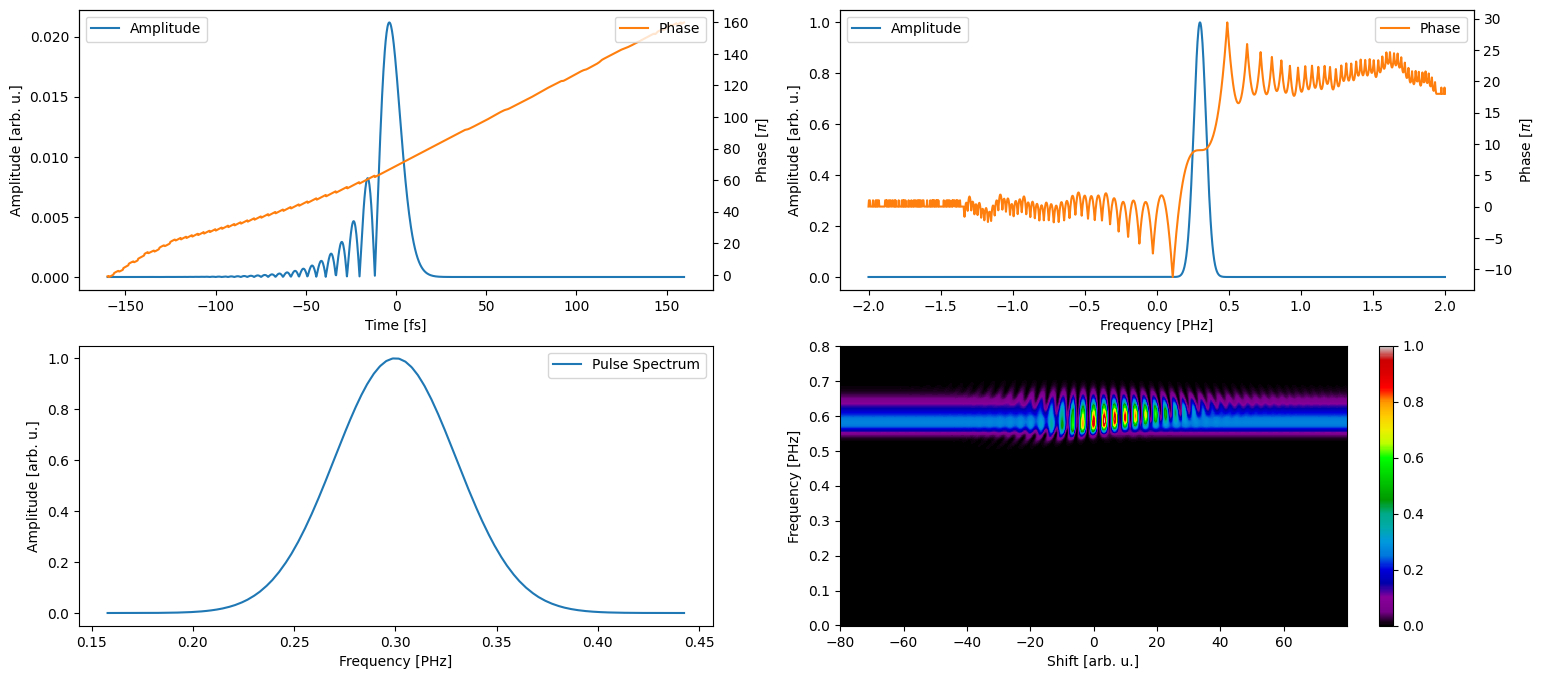

In [16]:
pulse_maker = MakePulse(N=128*10, Delta_f=2)

central_f = np.array([0.3])
phase = PolynomialPhase(central_frequency = central_f, coefficients = np.array([0.5, 0, 0, 1500]))
amp = GaussianAmplitude(central_frequency = central_f, amplitude = np.array([1.0]), fwhm = np.array([0.1]))
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp = pulse_maker.generate_pulse((amp, phase))

input_pulses = pulse_maker.pulses

from src import spectral_filter_funcs
from src.utilities import do_interpolation_1d
spectral_filter1 = spectral_filter_funcs.get_filter("lorentzian", frequency_inp, (1, 0.3, 0.05))
spectral_filter2 = spectral_filter_funcs.get_filter("lorentzian", frequency_inp, (1, 0.31, 0.05))

time, frequency, trace, spectra=pulse_maker.generate_2dsi(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "shg", cross_correlation=False, gate=(None,None),
                                                          N=256*2, scale_time_range=0.5, plot_stuff=True, cut_off_val=0.001, frequency_range=(0, 0.8),
                                                          interpolate_fft_conform=False,
                                                          spectral_filter1=spectral_filter1, spectral_filter2=spectral_filter2, tau_pulse_anc1=0, material_thickness=3)


spectral_filter1 = do_interpolation_1d(frequency, frequency_inp, spectral_filter1)
spectral_filter2 = do_interpolation_1d(frequency, frequency_inp, spectral_filter2)


In [8]:
from src.twodsi import DirectReconstruction, GeneralizedProjection, PtychographicIterativeEngine, COPRA
from src.twodsi import DifferentialEvolution, Evosax, LSF, AutoDiff

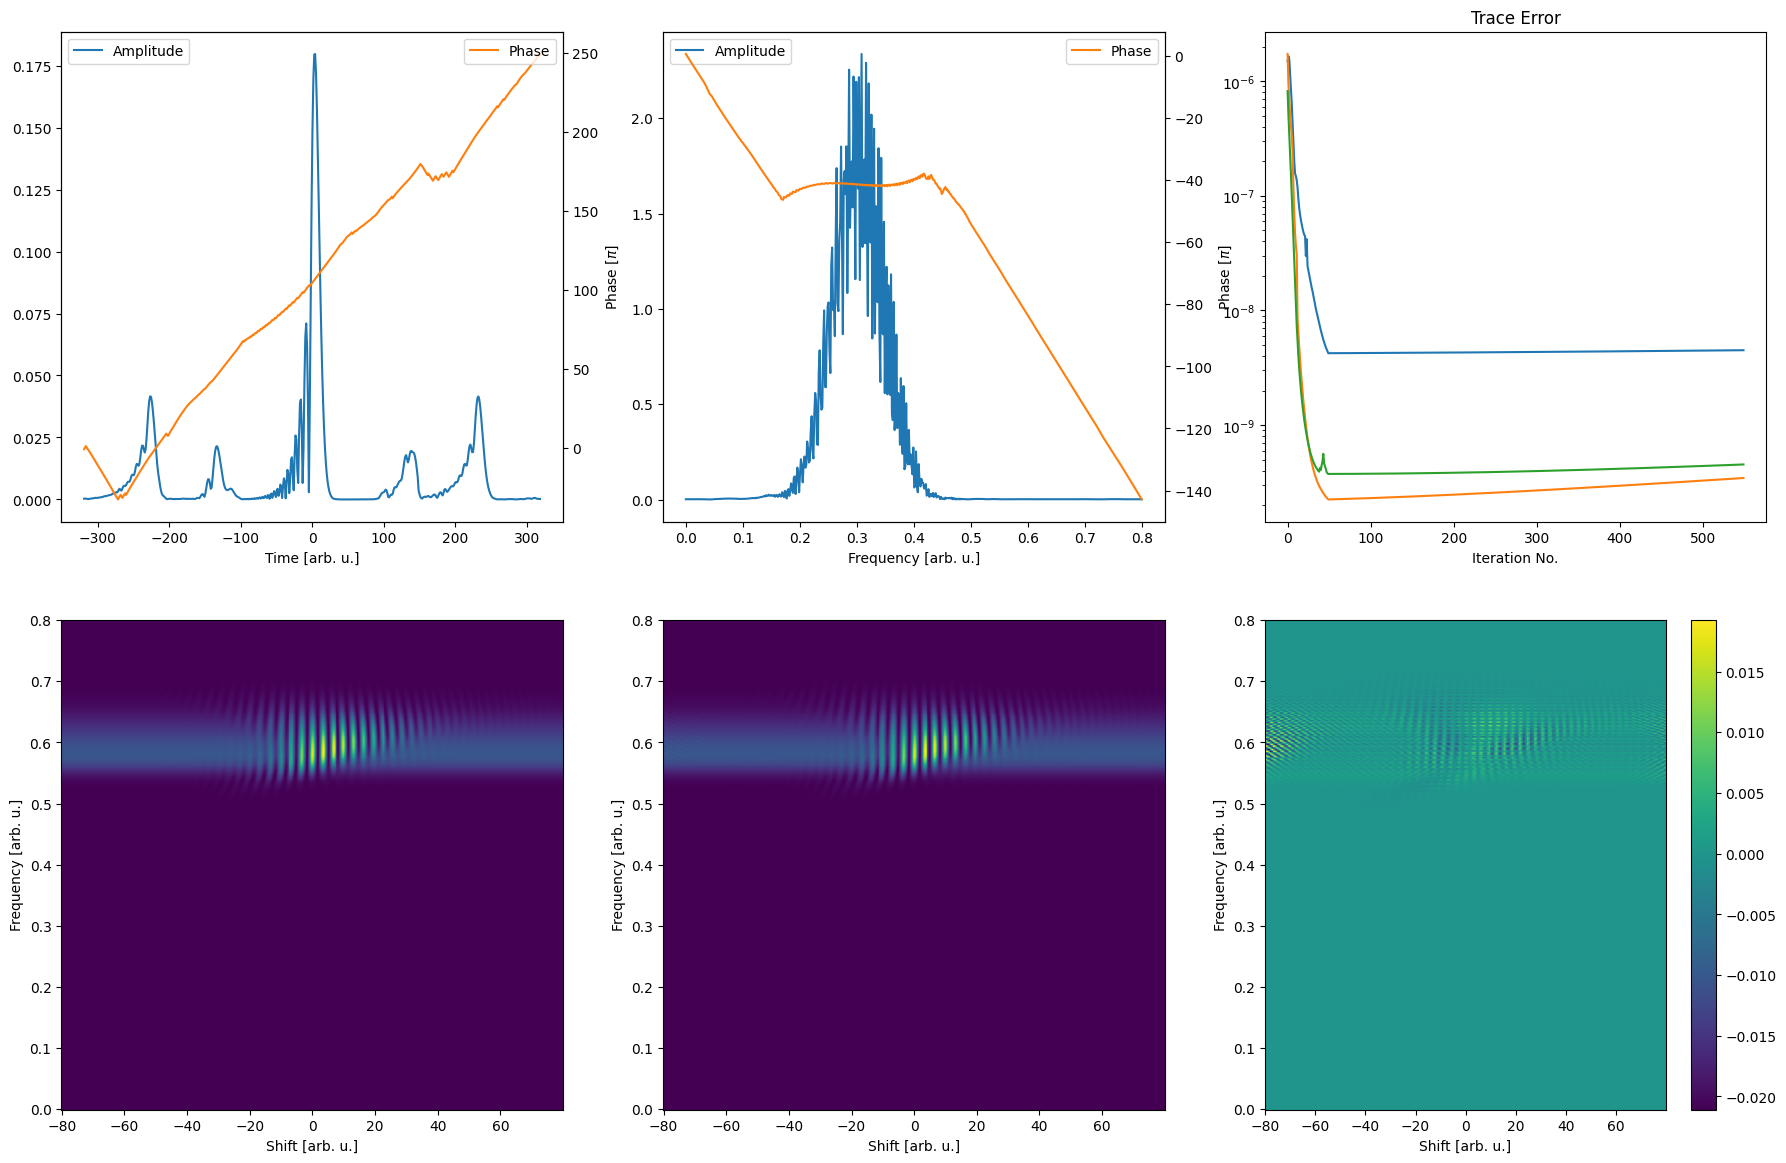

In [ ]:
# dr = DirectReconstruction(time, frequency, trace, "shg", cross_correlation=False, spectral_filter1=spectral_filter1, spectral_filter2=spectral_filter2)
# dr.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1])

# dr.windowing = False#"hamming"

# population = dr.create_initial_population(1)
# final_result = dr.run(population, no_iterations=10)
# dr.plot_results(final_result, exact_pulse=input_pulses)





# gp = GeneralizedProjection(time, frequency, trace, "shg", cross_correlation=False, spectral_filter1=spectral_filter1, spectral_filter2=spectral_filter2)
# population = gp.create_initial_population(population_size=5, guess_type="random")


# # gp.global_newton = "full"
# # gp.conjugate_gradients = False
# # gp.linalg_solver = "lineax"

# gp.global_gamma = 0.01

# gp.no_steps_descent = 15
# # gp.max_steps_linesearch = 15
# # gp.use_linesearch = "zoom"
# # gp.global_gamma = 1.0
# # gp.delta_gamma = 2.0
# # gp.c1 = 1e-4
# # gp.c2 = 0.5

# # gp.lbfgs_memory = 3

# # gp.use_copra_style_step_scaling = False


# final_result = gp.run(population, 50)
# gp.plot_results(final_result)








# tdp = PtychographicIterativeEngine(time, frequency, trace, "shg", cross_correlation=False, pie_method="rPIE", 
#                                    spectral_filter1=spectral_filter1, spectral_filter2=spectral_filter2, material_thickness=3)
# population = tdp.create_initial_population(population_size=3, guess_type="random")


# tdp.alpha = 0.1
# tdp.local_gamma = 0.01
# tdp.global_gamma = 0.000001

# # tdp.lbfgs_memory = 15
# # tdp.conjugate_gradients = False#"fletcher_reeves"

# # tdp.local_newton = "diagonal" #"lbfgs"
# # # tdp.use_linesearch = "backtracking" #"wolfe"
# # # #tdp.lambda_lm = 1e-2

# # tdp.r_local_method = "iteration"
# # tdp.r_gradient = "amplitude"
# # tdp.r_newton = True
# # tdp.r_no_iterations = 2

# final_result = tdp.run(population, 50, 500)
# tdp.plot_results(final_result)







# copra = COPRA(time, frequency, trace, "shg", cross_correlation=False, spectral_filter1=spectral_filter1, spectral_filter2=spectral_filter2, material_thickness=3)
# population = copra.create_initial_population(population_size=5, guess_type="constant_phase")


# # copra.use_linesearch = False #"wolfe"

# # copra.local_gamma=1
# # copra.global_gamma=0.5
# # copra.local_adaptive_scaling = "original"
# # copra.global_adaptive_scaling = "original"
# # copra.xi=1e-12

# # copra.local_hessian=False
# # copra.global_hessian=False#"full"

# final_result = copra.run(population, 10, 100)
# copra.plot_results(final_result)




In [10]:
from src.utilities import get_score_values

In [11]:
get_score_values(final_result, input_pulses)

(Array(0.33743238, dtype=float32),
 Array(0.32183373, dtype=float32),
 Array(0.32183385, dtype=float32),
 Array(0.68870074, dtype=float32))

In [ ]:
# de = DifferentialEvolution(time, frequency, trace, "pg", cross_correlation = "doubleblind")#.use_measured_spectrum()

# anc1 = de.get_anc_pulse(frequency_gate_1, pulse_f_gate_1, anc_no=1)
# anc2 = de.get_anc_pulse(frequency_gate_2, pulse_f_gate_2, anc_no=2)

# population = de.create_initial_population(population_size=10, phase_type="bsplines_5", amp_type="bsplines_5", no_funcs_phase=25, no_funcs_amp=25)

# de.strategy="best1_bin"

# final_result = de.run(population, 20)
# de.plot_results(final_result)




# from evosax.algorithms import CMA_ES
# evo = Evosax(time, frequency, trace, "pg", cross_correlation="doubleblind")

# anc1 = evo.get_anc_pulse(frequency_gate_1, pulse_f_gate_1, anc_no=1)
# anc2 = evo.get_anc_pulse(frequency_gate_2, pulse_f_gate_2, anc_no=2)

# population = evo.create_initial_population(population_size=10)

# evo.solver = CMA_ES

# final_result = evo.run(population, 10)
# evo.plot_results(final_result)




# lsf = LSF(time, frequency, trace, "pg", cross_correlation="doubleblind")
# population = lsf.create_initial_population(population_size=3, amp_type="discrete", phase_type="discrete")

# anc1 = lsf.get_anc_pulse(frequency_gate_1, pulse_f_gate_1, anc_no=1)
# anc2 = lsf.get_anc_pulse(frequency_gate_2, pulse_f_gate_2, anc_no=2)

# # lsf.number_of_bisection_iterations=12
# # lsf.random_direction_mode="random"
# # lsf.no_points_for_continuous=5

# final_result = lsf.run(population, 100)
# lsf.plot_results(final_result)





# ad = AutoDiff(time, frequency, trace, "pg", cross_correlation="doubleblind")

# anc1 = ad.get_anc_pulse(frequency_gate_1, pulse_f_gate_1, anc_no=1)
# anc2 = ad.get_anc_pulse(frequency_gate_2, pulse_f_gate_2, anc_no=2)

# population = ad.create_initial_population(population_size=3, amp_type="constant", phase_type="constant", no_funcs_amp=1, no_funcs_phase=30)

# # ad.alternating_optimization = True
# # ad.solver = optax.adam(learning_rate=1e-1)

# import optimistix
# import optax
# #ad.solver = optimistix.GaussNewton
# ad.solver = optax.adam(learning_rate=0.1)
# #population = pop_final
# final_result = ad.run(population, 150)
# ad.plot_results(final_result)

In [4]:
from src.frog import Vanilla, LSGPA, GeneralizedProjection, PtychographicIterativeEngine, COPRA

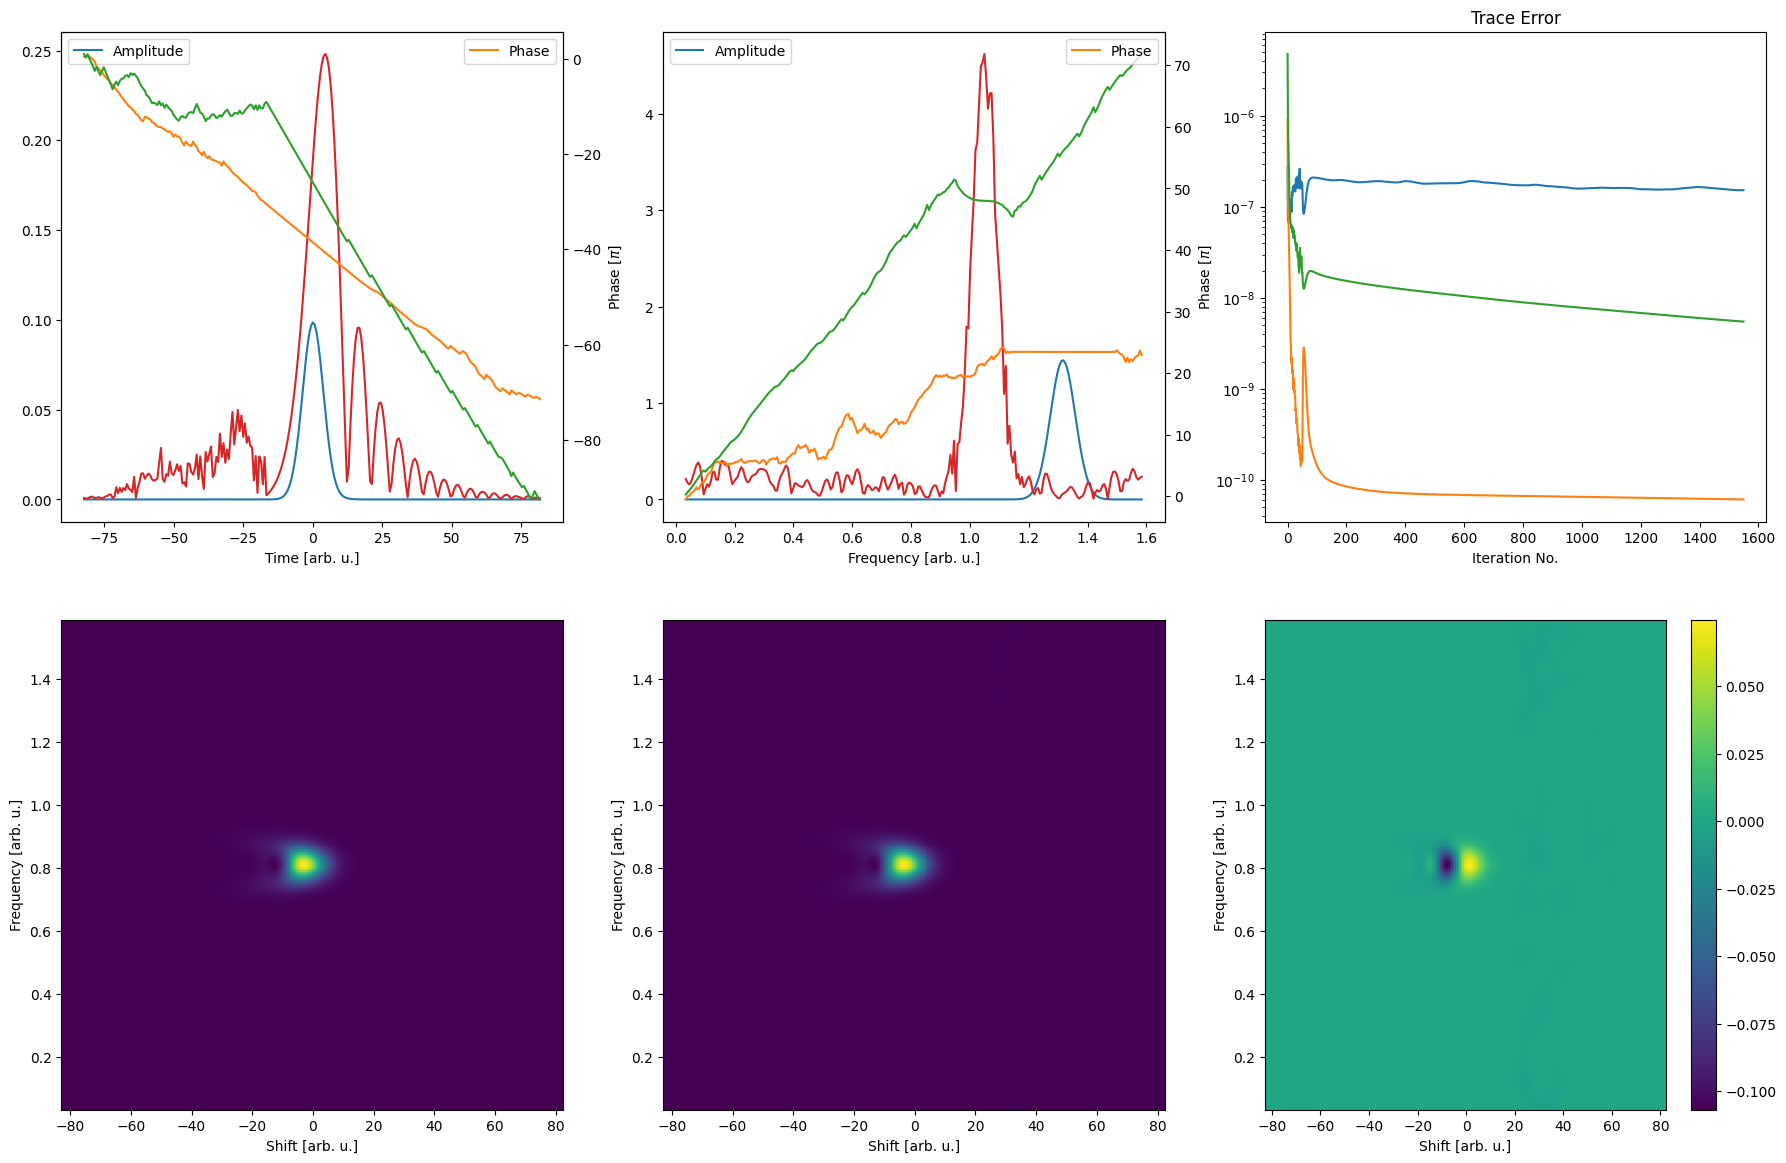

In [ ]:
# vanilla = Vanilla(time, frequency, trace, "pg")
# population = vanilla.create_initial_population(population_size=3, guess_type="random")

# final_result = vanilla.run(population, 10)
# vanilla.plot_results(final_result)






# lsgpa = LSGPA(time, frequency, trace, "pg", cross_correlation=False)#.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")
# population = lsgpa.create_initial_population(population_size=3, guess_type="random")

# final_result = lsgpa.run(population, 10)
# lsgpa.plot_results(final_result)






# gp = GeneralizedProjection(time, frequency, trace, "shg", cross_correlation="doubleblind")
# population = gp.create_initial_population(population_size=3, guess_type="random")

# # gp.global_newton = "full"
# # gp.conjugate_gradients = False
# # gp.linalg_solver = "lineax"

# gp.global_gamma = 1

# gp.no_steps_descent = 25
# # gp.max_steps_linesearch = 15
# # gp.use_linesearch = "zoom"
# # gp.global_gamma = 1.0
# # gp.delta_gamma = 2.0
# # gp.c1 = 1e-4
# # gp.c2 = 0.5

# # gp.lbfgs_memory = 3

# # gp.use_copra_style_step_scaling = False


# final_result = gp.run(population, 150)
# gp.plot_results(final_result)






# tdp = PtychographicIterativeEngine(time, frequency, trace, "shg", "rPIE", cross_correlation="doubleblind")
# population = tdp.create_initial_population(population_size=3, guess_type="random")

# tdp.alpha = 0.1
# tdp.local_gamma = 0.1
# tdp.global_gamma = 0.01

# # tdp.lbfgs_memory = 15
# # tdp.conjugate_gradients = False#"fletcher_reeves"

# #tdp.local_newton = "diagonal" #"lbfgs"
# # tdp.use_linesearch = "backtracking" #"wolfe"
# # #tdp.lambda_lm = 1e-2

# # tdp.r_local_method = "iteration"
# # tdp.r_gradient = "amplitude"
# # tdp.r_newton = True
# # tdp.r_no_iterations = 2

# final_result = tdp.run(population, 50, 1500)
# tdp.plot_results(final_result, doubleblind=True)





# copra = COPRA(time, frequency, trace, "shg", cross_correlation="doubleblind")
# population = copra.create_initial_population(population_size=3, guess_type="random")

# # copra.use_linesearch = False #"wolfe"

# # copra.local_gamma=1
# # copra.global_gamma=0.5
# # copra.local_adaptive_scaling = "original"
# # copra.global_adaptive_scaling = "original"
# # copra.xi = 1e-1

# # copra.local_hessian=False
# # copra.global_hessian=False#"full"

# final_result = copra.run(population, 20, 1500)
# copra.plot_results(final_result)



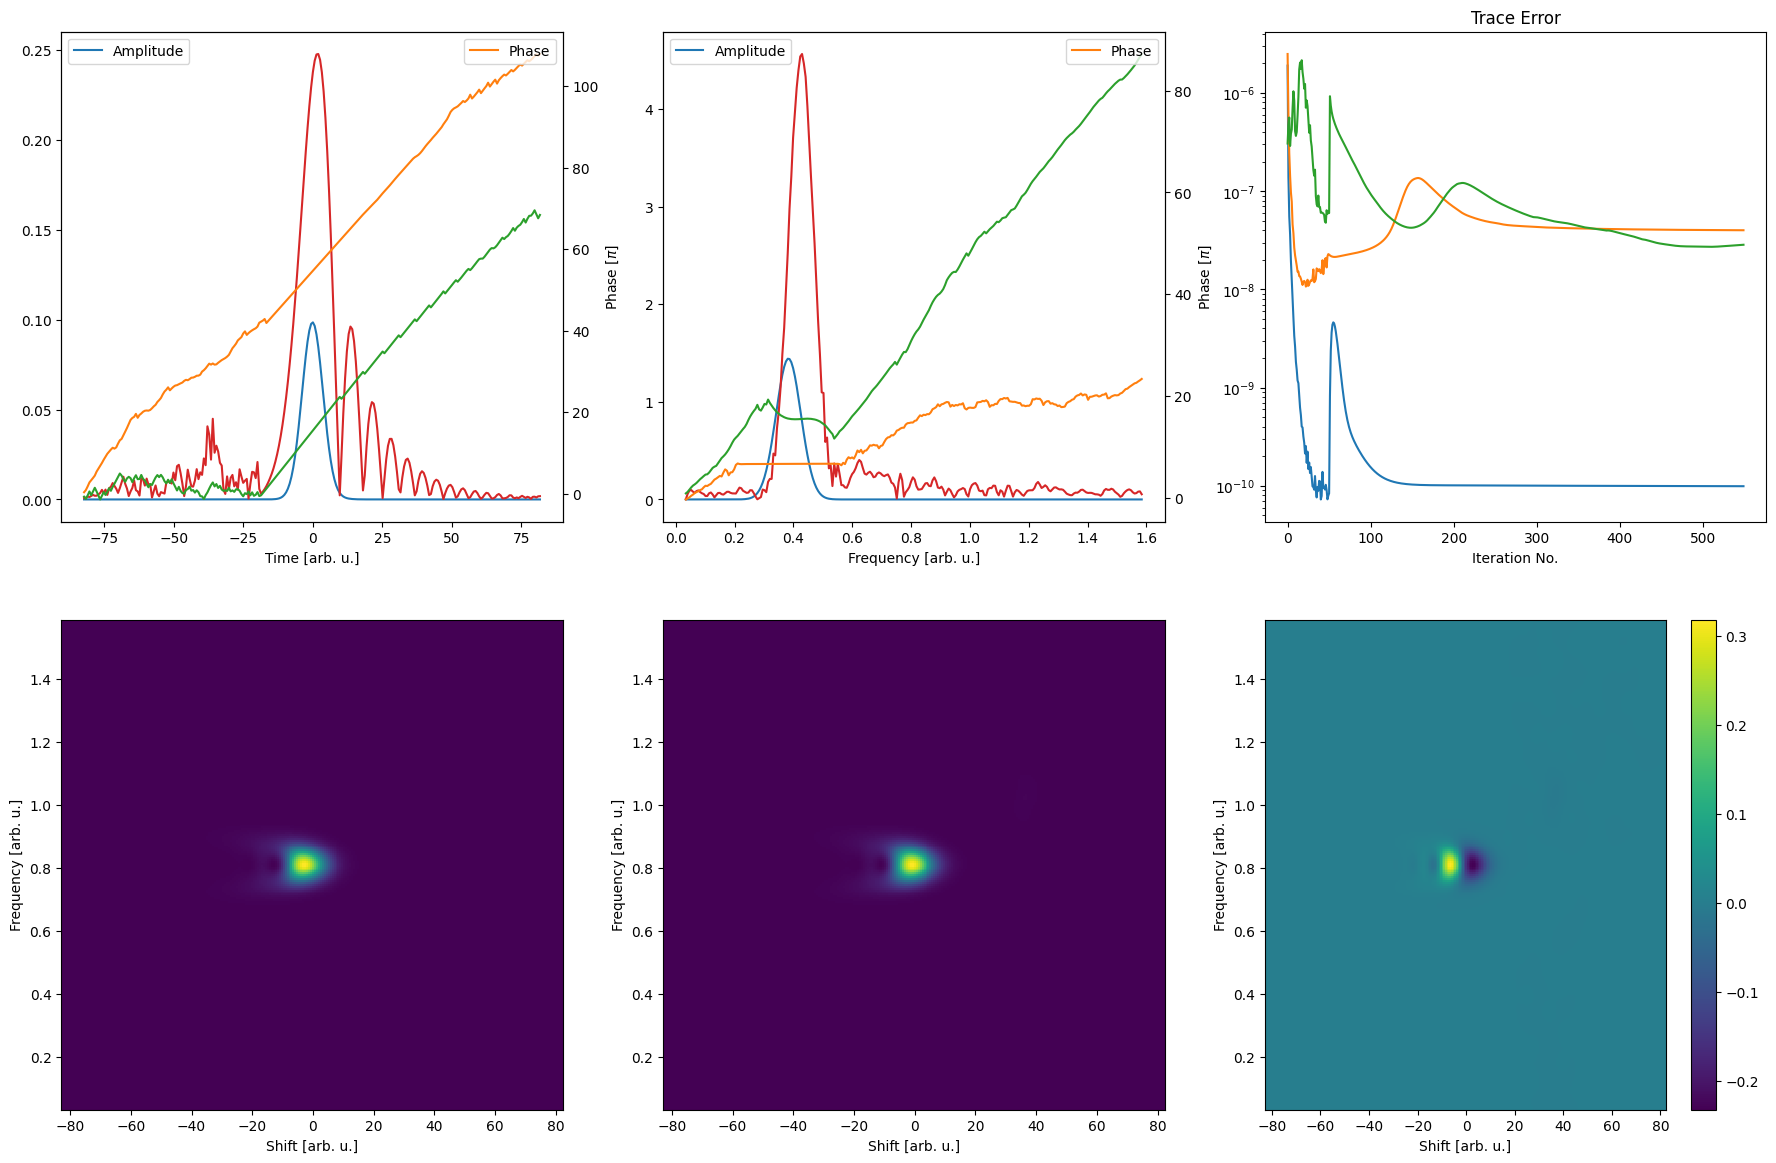

In [7]:
tdp.plot_results(final_result, doubleblind=True)

In [49]:
from src.utilities import get_score_values

In [74]:
get_score_values(final_result, pulse_maker.pulses, doubleblind=True, factor=1)

(Array(0.06997013, dtype=float32),
 Array(0.00690895, dtype=float32),
 Array(0.9939401, dtype=float32),
 Array(0.18236731, dtype=float32))

In [75]:
get_score_values(final_result, pulse_maker.pulses, doubleblind=True, factor=-1)

(Array(0.06997013, dtype=float32),
 Array(0.00690895, dtype=float32),
 Array(0.9939401, dtype=float32),
 Array(888.8031, dtype=float32))

In [ ]:
from src.chirp_scan import Basic, GeneralizedProjection, PtychographicIterativeEngine, COPRA

In [ ]:
# basic = Basic(z_arr, frequency, trace, "shg", phase_matrix_func=phase_matrix_func, chirp_parameters=parameters)
# population = basic.create_initial_population(population_size=3, guess_type="random")

# final_result = basic.run(population, 10)
# basic.plot_results(final_result)





gp = GeneralizedProjection(z_arr, frequency, trace, "shg", phase_matrix_func=phase_matrix_func, chirp_parameters=parameters)
population = gp.create_initial_population(population_size=3, guess_type="random")

gp.global_newton="diagonal"
# gp.no_steps_descent=50
# gp.gamma=1

final_result = gp.run(population, 10)
gp.plot_results(final_result)




# tdp = PtychographicIterativeEngine(z_arr, frequency, trace, "shg", pie_method="rPIE", 
#                              phase_matrix_func=phase_matrix_func, chirp_parameters=parameters)
# population = tdp.create_initial_population(population_size=3, guess_type="random")

# # tdp.alpha=0.1
# # tdp.local_gamma=0.001
# # tdp.global_gamma=0.001

# # tdp.use_linesearch=False
# # tdp.global_hessian=False #"diagonal"

# final_result = tdp.run(population, 10, 10)
# tdp.plot_results(final_result)






# copra = COPRA(z_arr, frequency, trace, "shg", phase_matrix_func=phase_matrix_func, chirp_parameters=parameters)
# population = copra.create_initial_population(population_size=3, guess_type="random")

# # copra.local_gamma = 1
# # copra.global_gamma = 0.25

# # copra.local_hessian = False
# # copra.global_hessian = False

# # copra.local_adaptive_scaling = False
# # copra.global_adaptive_scaling = False

# # copra.xi=1e-6

# final_result = copra.run(population, 10, 10)
# copra.plot_results(final_result)

/home/tillstehling/miniconda3/lib/python3.11/site-packages/refractiveindex/refractiveindex.py:297: RuntimeWarning: invalid value encountered in divide
  g = lambda c1, c2, w: c1 * (w ** 2) / (w ** 2 - c2 ** 2)
/home/tillstehling/miniconda3/lib/python3.11/site-packages/refractiveindex/refractiveindex.py:300: RuntimeWarning: invalid value encountered in sqrt
  n = np.sqrt(nsq)


TypeError: calc_Z_error_pseudo_hessian_one_m() got multiple values for argument 'time'

In [ ]:
Basic.__mro__

(src.chirp_scan.classic_algorithms_chirpscan.Basic,
 src.core.base_classes_algorithms.ClassicAlgorithmsBASE,
 src.core.base_classes_algorithms.AlgorithmsBASE,
 src.core.base_classes_methods.RetrievePulsesCHIRPSCAN,
 src.core.base_classes_methods.RetrievePulses,
 object)

In [ ]:
from src.frog import AutoDiff

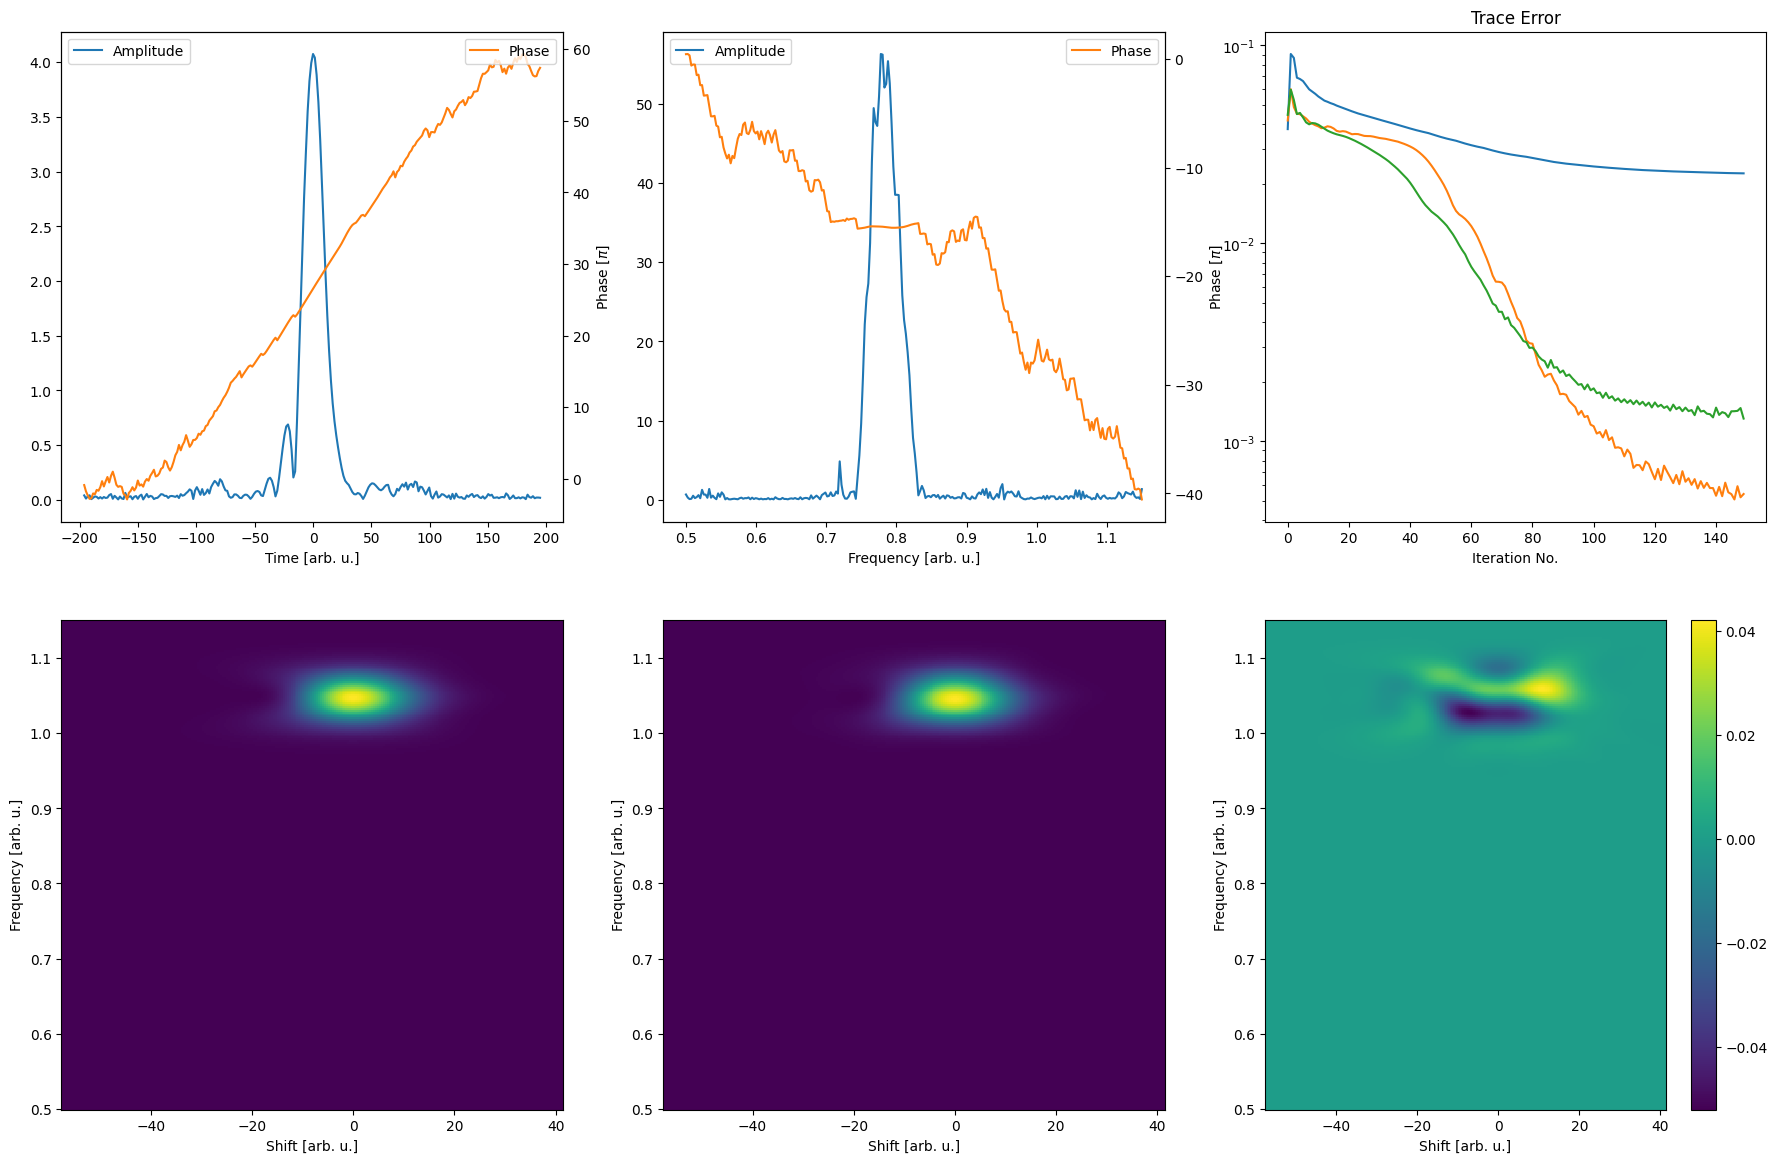

In [ ]:
# de = frog.DifferentialEvolution(time, frequency, trace, "thg", cross_correlation=False, real_fields="flip")#.use_measured_spectrum()
# #spectral_amplitude = de.get_spectral_amplitude(spectra.pulse[0], spectra.pulse[1], "pulse")
# #spectral_amplitude = de.get_spectral_amplitude(spectra.gate[0], spectra.gate[1], "gate")

# population = de.create_initial_population(population_size=100, phase_type="bsplines_5", amp_type="bsplines_5", no_funcs_phase=25, no_funcs_amp=25)

# de.strategy="best1_bin"

# final_result = de.run(population, 20)
# de.plot_results(final_result)




# from evosax.algorithms import CMA_ES
# evo = Evosax(time, frequency, trace, "pg", cross_correlation="doubleblind")#.use_measured_spectrum()
# # spectral_amplitude = evo.get_spectral_amplitude(spectra.pulse[0], spectra.pulse[1], "pulse")
# # spectral_amplitude = evo.get_spectral_amplitude(spectra.gate[0], spectra.gate[1], "gate")

# population = evo.create_initial_population(population_size=10)

# evo.solver = CMA_ES

# final_result = evo.run(population, 10)
# evo.plot_results(final_result)




# lsf = frog.LSF(time, frequency, trace, "pg", cross_correlation=False, f_range_fields=(0.2,0.5))#.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")

# population = lsf.create_initial_population(population_size=3, amp_type="discrete", phase_type="discrete")

# # lsf.number_of_bisection_iterations=12
# # lsf.random_direction_mode="random"
# # lsf.no_points_for_continuous=5

# final_result = lsf.run(population, 10)
# lsf.plot_results(final_result)





ad = AutoDiff(time, frequency, trace, "thg")
# spectral_amplitude = ad.get_spectral_amplitude(spectra.pulse[0], spectra.pulse[1], "pulse")
# spectral_amplitude = ad.get_spectral_amplitude(spectra.gate[0], spectra.gate[1], "gate")

population = ad.create_initial_population(population_size=3, amp_type="constant", phase_type="constant", no_funcs_amp=1, no_funcs_phase=30)

# ad.alternating_optimization = True
# ad.solver = optax.adam(learning_rate=1e-1)

ad.fd_grad = 0
ad.amplitude_or_intensity = 0.25

import optimistix
import optax
#ad.solver = optimistix.GaussNewton
ad.solver = optax.adam(learning_rate=1)
#population = pop_final
final_result = ad.run(population, 150)
ad.plot_results(final_result)

In [ ]:
t=jnp.gradient(jnp.gradient(jnp.gradient(jnp.gradient(ad.measurement_info.measured_trace, axis=0), axis=0), axis=0), axis=0)

In [ ]:
from src.chirp_scan import DifferentialEvolution, Evosax, LSF, AutoDiff

In [ ]:
a = jnp.asarray(np.random.uniform(-1,1,size=(3,4,5)))
b = jnp.asarray(np.random.uniform(-1,1,size=(3,4,5)))

In [ ]:
ab_0 = jnp.einsum("ijk, ilm -> jklm", a, b)
ab_1 = jnp.tensordot(a,b, axes=(0,0))


/home/tillstehling/miniconda3/lib/python3.11/site-packages/refractiveindex/refractiveindex.py:297: RuntimeWarning: invalid value encountered in divide
  g = lambda c1, c2, w: c1 * (w ** 2) / (w ** 2 - c2 ** 2)
/home/tillstehling/miniconda3/lib/python3.11/site-packages/refractiveindex/refractiveindex.py:300: RuntimeWarning: invalid value encountered in sqrt
  n = np.sqrt(nsq)


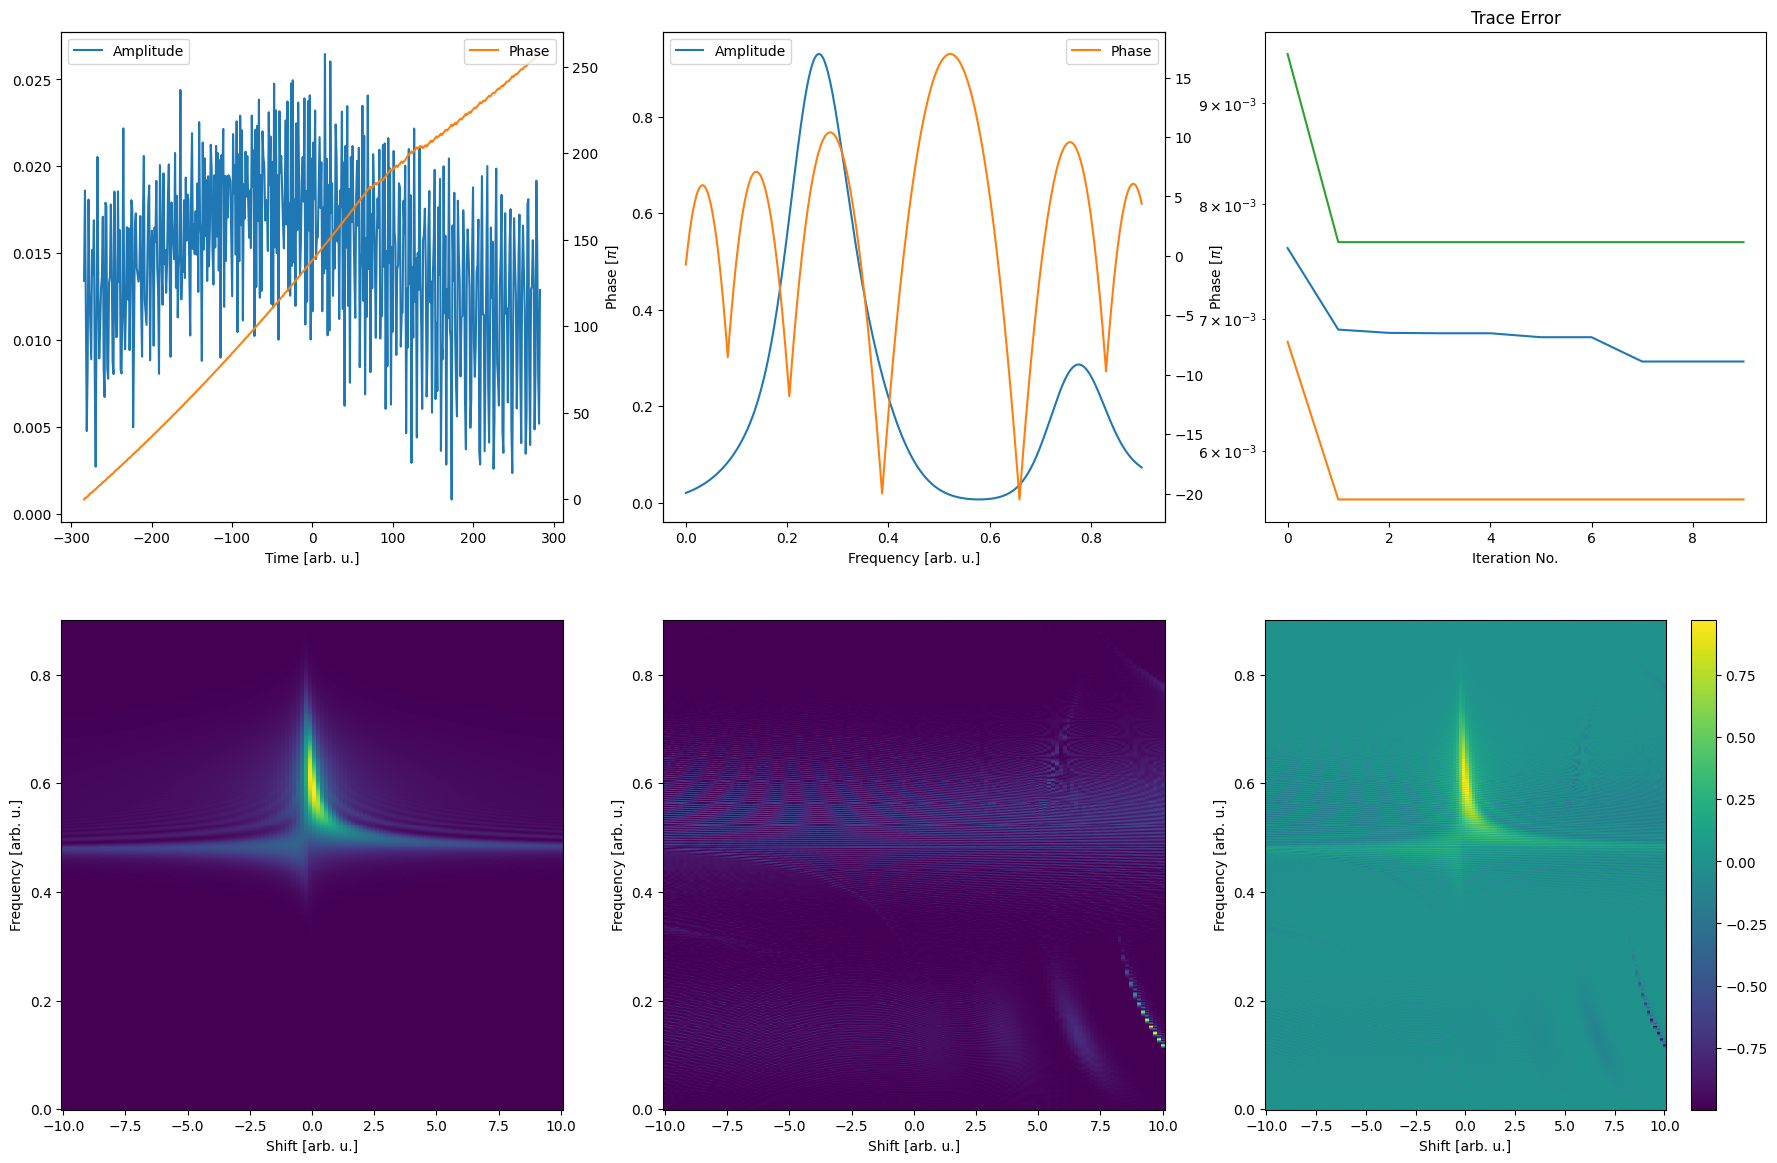

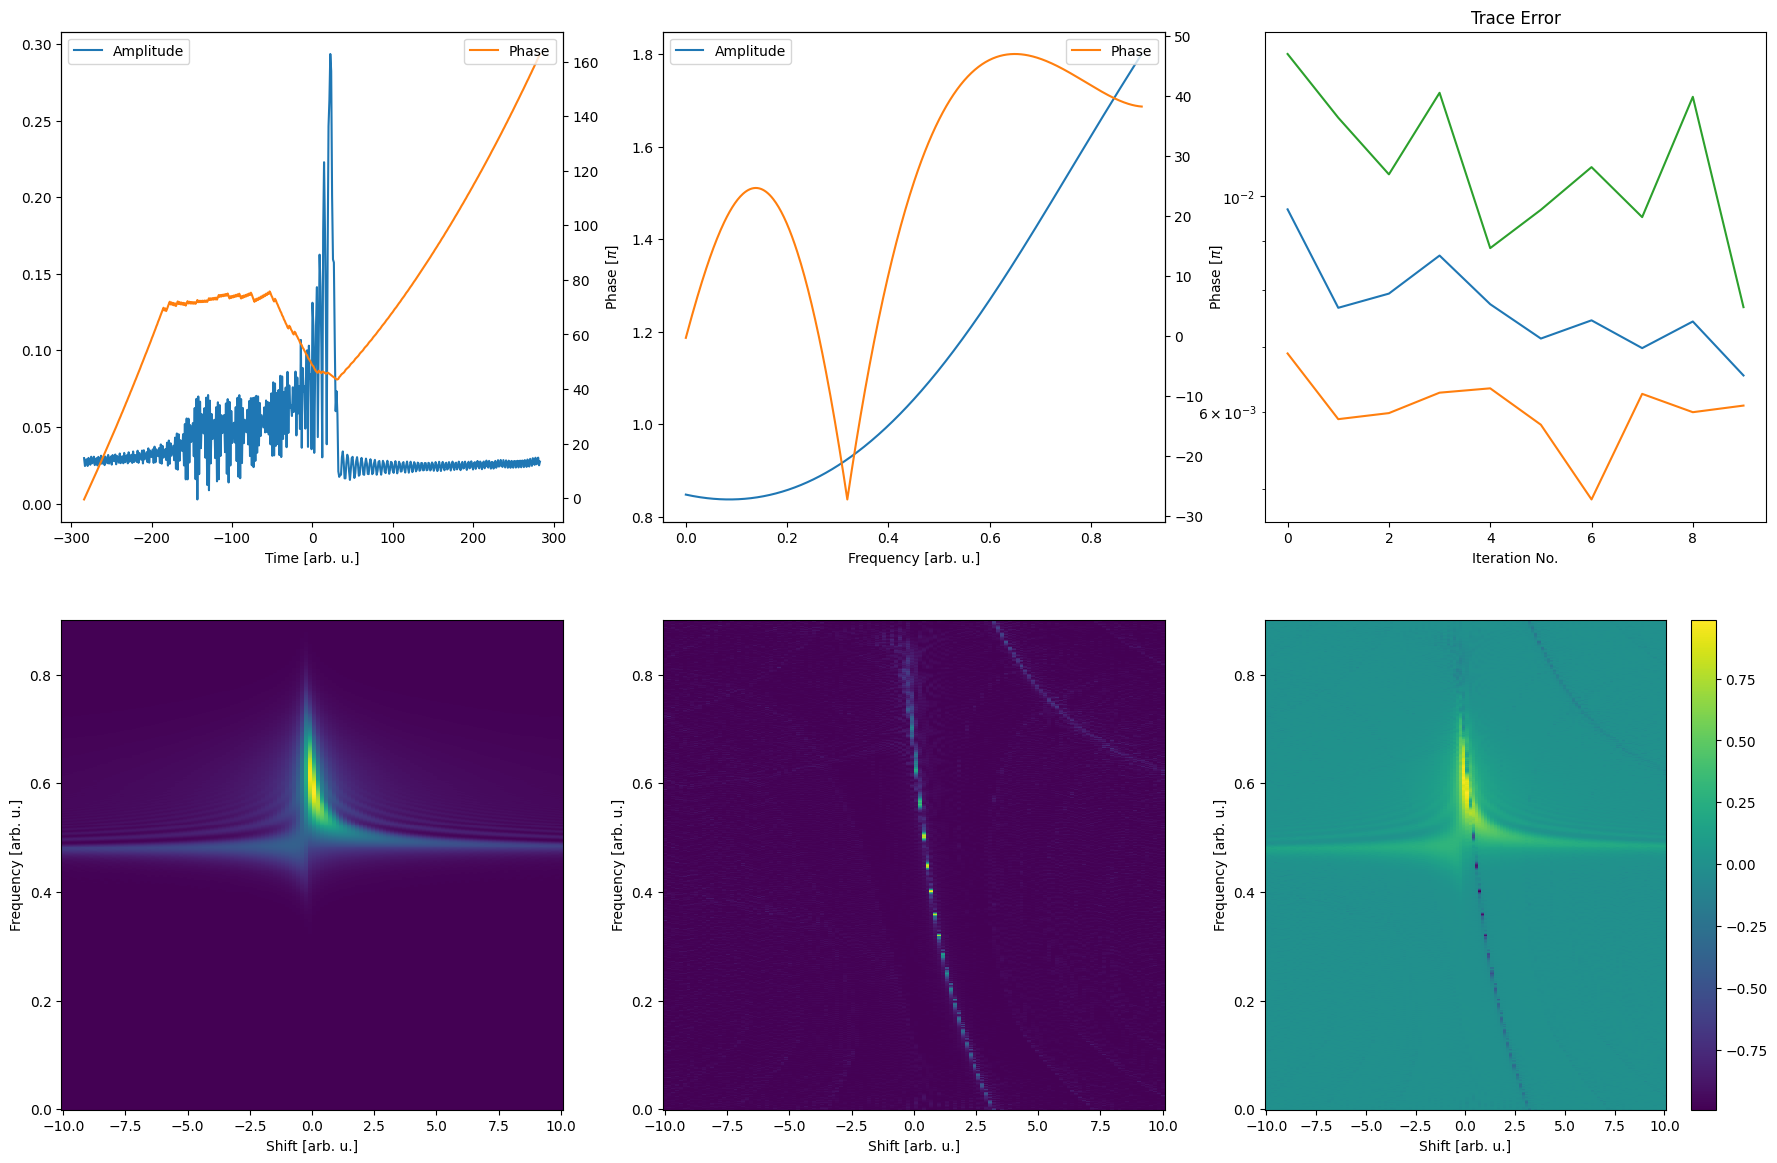

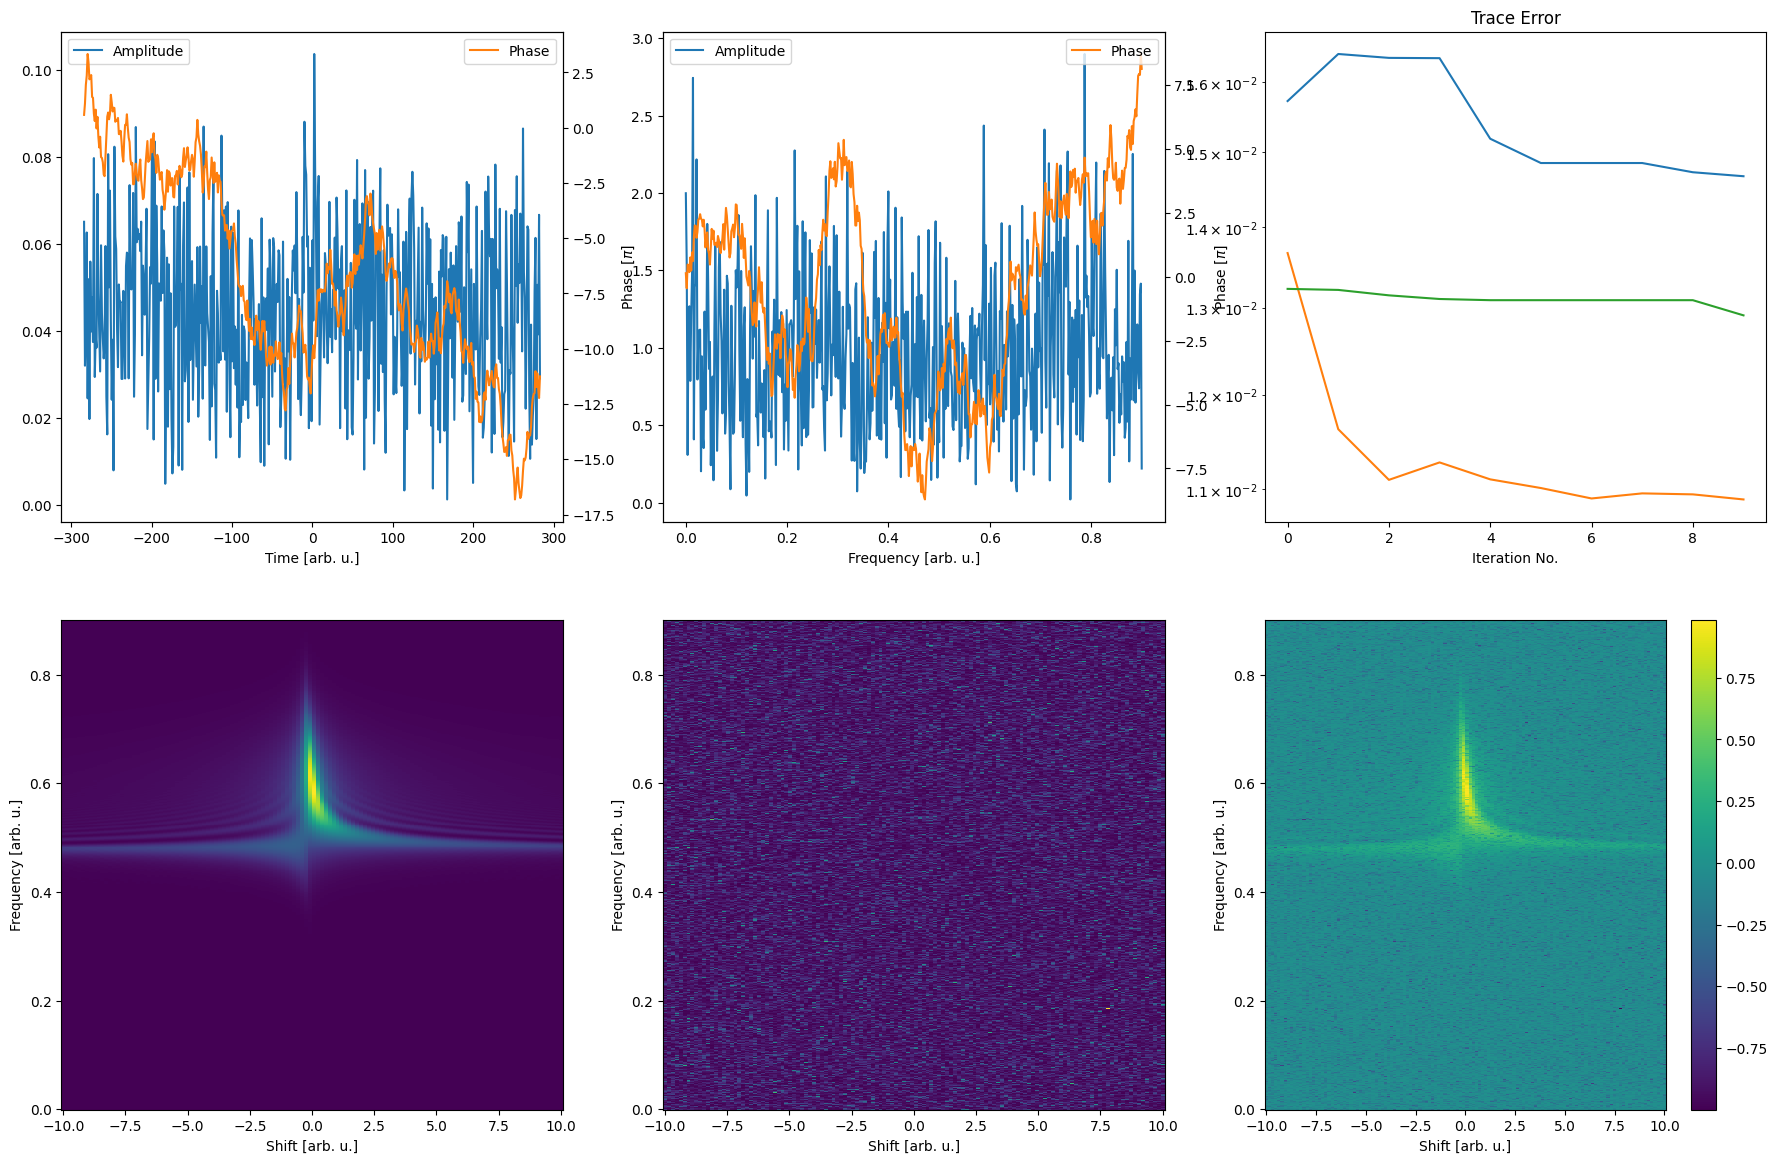

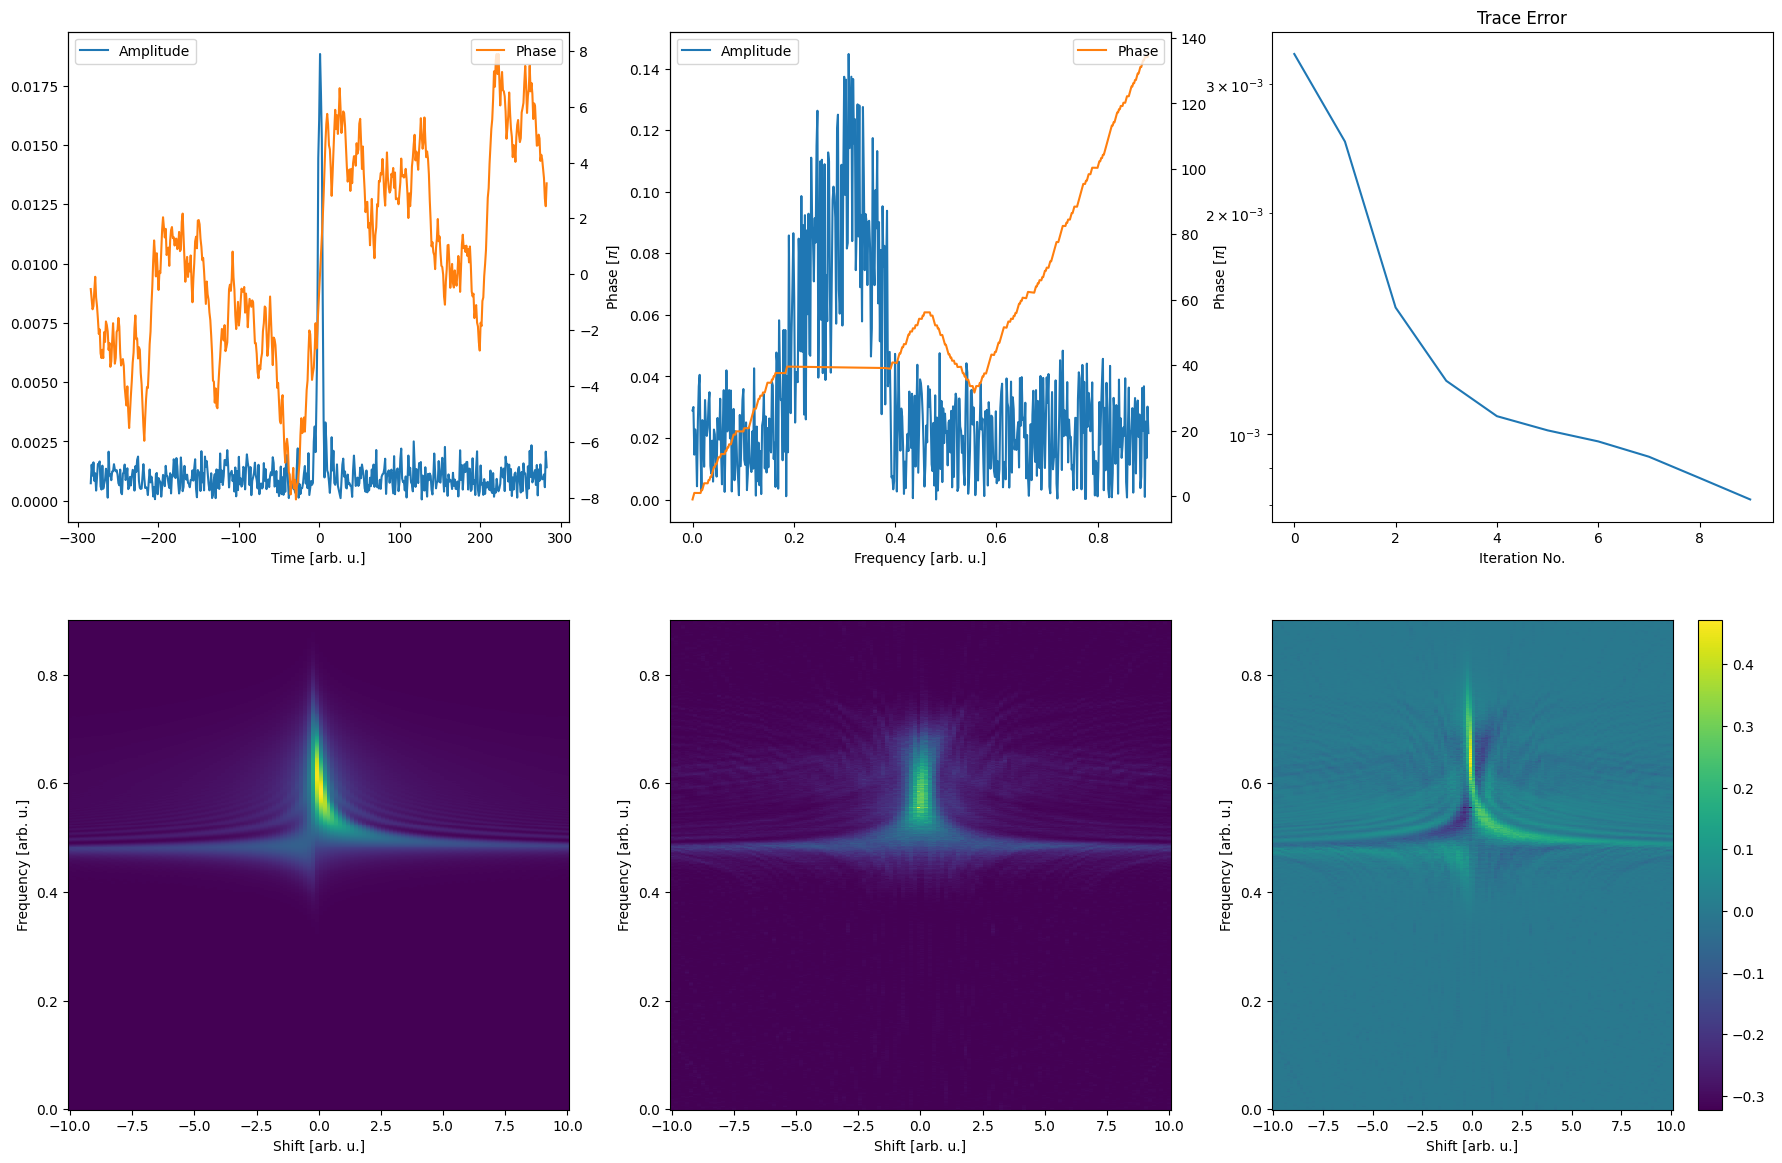

In [ ]:
de = DifferentialEvolution(z_arr, frequency, trace, "shg", phase_matrix_func=phase_matrix_func, chirp_parameters=parameters)
population = de.create_initial_population(population_size=10)

final_result = de.run(population, 10)
de.plot_results(final_result)




from evosax.algorithms import CMA_ES
evo = Evosax(z_arr, frequency, trace, "shg", phase_matrix_func=phase_matrix_func, chirp_parameters=parameters)
evo.solver = CMA_ES
population = evo.create_initial_population(population_size=10)

final_result = evo.run(population, 10)
evo.plot_results(final_result)




lsf = LSF(z_arr, frequency, trace, "shg", phase_matrix_func=phase_matrix_func, chirp_parameters=parameters)
population = lsf.create_initial_population(population_size=3, amp_type="random", phase_type="random")

lsf.number_of_bisection_iterations=8
lsf.random_direction_mode="random"
lsf.no_points_for_continuous=15

final_result = lsf.run(population, 10)
lsf.plot_results(final_result)





ad = AutoDiff(z_arr, frequency, trace, "shg", phase_matrix_func=phase_matrix_func, chirp_parameters=parameters)
population = ad.create_initial_population(population_size=1, amp_type="discrete", phase_type="discrete")

#ad.solver=optax.adam(learning_rate=1e-1)

final_result = ad.run(population, 10)
ad.plot_results(final_result)

In [ ]:
path = "nir_compressed.csv"
import pandas as pd

In [ ]:
df = pd.read_csv(path)

df

fAx (PHz)  phi_nir (rad)   amp_nir  phi_ir (rad)  amp_ir     tAx (fs)  \
0      0.290328      -0.399403  0.068648           0.0     0.0 -1700.680272   
1      0.290622       0.000000 -0.088900           0.0    -0.0 -1699.849862   
2      0.290916      -0.418225  0.050774           0.0    -0.0 -1699.019452   
3      0.291209      -0.405899  0.063572           0.0     0.0 -1698.189041   
4      0.291503       0.000000 -0.063360           0.0     0.0 -1697.358631   
...         ...            ...       ...           ...     ...          ...   
4091        NaN            NaN       NaN           NaN     NaN  1696.528221   
4092        NaN            NaN       NaN           NaN     NaN  1697.358631   
4093        NaN            NaN       NaN           NaN     NaN  1698.189041   
4094        NaN            NaN       NaN           NaN     NaN  1699.019452   
4095        NaN            NaN       NaN           NaN     NaN  1699.849862   

      envelope_ir  envelope_nir  envelope_synth  envelope_ir (flat phase)  \
0        0.004235      0.096808        0.100863                  0.005172   
1        0.004311      0.086255        0.087122                  0.005149   
2        0.004366      0.029370        0.027824                  0.005087   
3        0.004381      0.051899        0.055727                  0.005009   
4        0.004347      0.041491        0.042265                  0.004941   
...           ...           ...             ...                       ...   
4091     0.004316      0.089308        0.092204                  0.004910   
4092     0.004220      0.026438        0.028048                  0.004941   
4093     0.004152      0.050890        0.053314                  0.005009   
4094     0.004133      0.061658        0.060091                  0.005087   
4095     0.004166      0.100328        0.104130                  0.005149   

      envelope_nir (flat phase)  envelope_synth (flat phase)  
0                      0.094694                     0.089522  
1                      0.097653                     0.094392  
2                      0.039884                     0.044792  
3                      0.055993                     0.051109  
4                      0.013694                     0.018508  
...                         ...                          ...  
4091                   0.109621                     0.104850  
4092                   0.013694                     0.018508  
4093                   0.055993                     0.051109  
4094                   0.039884                     0.044792  
4095                   0.097653                     0.094392  

[4096 rows x 12 columns]

In [ ]:
amp = df.amp_ir.to_numpy()
f = df[df.keys()[0]].to_numpy()

In [ ]:
phi_ir=df[df.keys()[1]].to_numpy()

In [ ]:
from src.utilities import do_interpolation_1d
from src.core.phase_matrix_funcs import parameters_material_scan as parameters

In [ ]:
fmin=2
freq = jnp.linspace(-fmin, fmin, 128*200)
time = jnp.fft.fftshift(jnp.fft.fftfreq(len(freq), jnp.mean(jnp.diff(freq))))

amp_freq = do_interpolation_1d(freq, f, amp)
phase_freq = do_interpolation_1d(freq, f, phi_ir)

In [ ]:
c = 0#100
n = 2

f0 = 0.18*2

chirp_phase = c*(2*jnp.pi)**n*(freq-f0)**n

In [ ]:
pulse_f = jnp.sqrt(jnp.abs(amp_freq))*jnp.exp(1j*phase_freq)*jnp.exp(1j*chirp_phase)
pulse_f = jnp.where(jnp.isnan(pulse_f), 1e-12+0j, pulse_f)
pulse_t = jnp.fft.fftshift(jnp.fft.ifft(pulse_f))

In [ ]:
from scipy.constants import c as c0
import refractiveindex

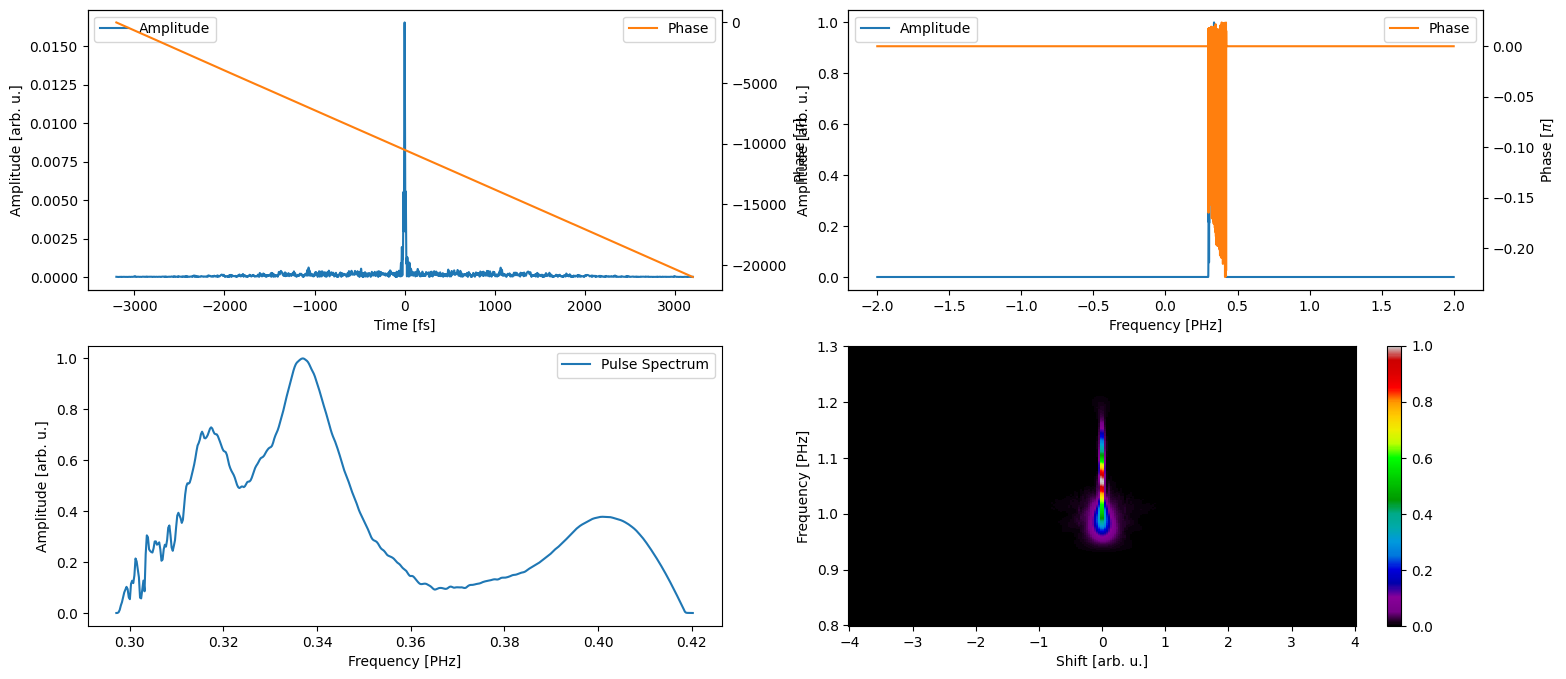

In [ ]:
pulse_maker = MakePulse(N=128, Delta_f=4)


z_arr = jnp.linspace(-4, 4, 128*2)-0
#parameters = (refractiveindex.RefractiveIndexMaterial(shelf="main", book="ZnSe", page="Marple"), c0)
#parameters = (refractiveindex.RefractiveIndexMaterial(shelf="main", book="SiO2", page="Malitson"), c0)
z_arr, frequency, trace, spectra = pulse_maker.generate_chirpscan(z_arr, time, freq, pulse_t, pulse_f,
                                                              "thg", "material", parameters,
                                                              N=128*4, cut_off_val=1e-1, real_fields=True, frequency_range=(0.8, 1.3))#, real_fields=False)

In [ ]:
z_arr = jnp.linspace(-4,4,128*2)
ir_trace_compressed = jnp.copy(trace)

In [ ]:
z_arr = jnp.linspace(-4, 4, 128*2)-6
ir_trace_GDD = jnp.copy(trace) # 100fs^2

In [ ]:
z_arr = jnp.linspace(-4, 4, 128*2)
ir_trace_TOD = jnp.copy(trace) #75 fs^3

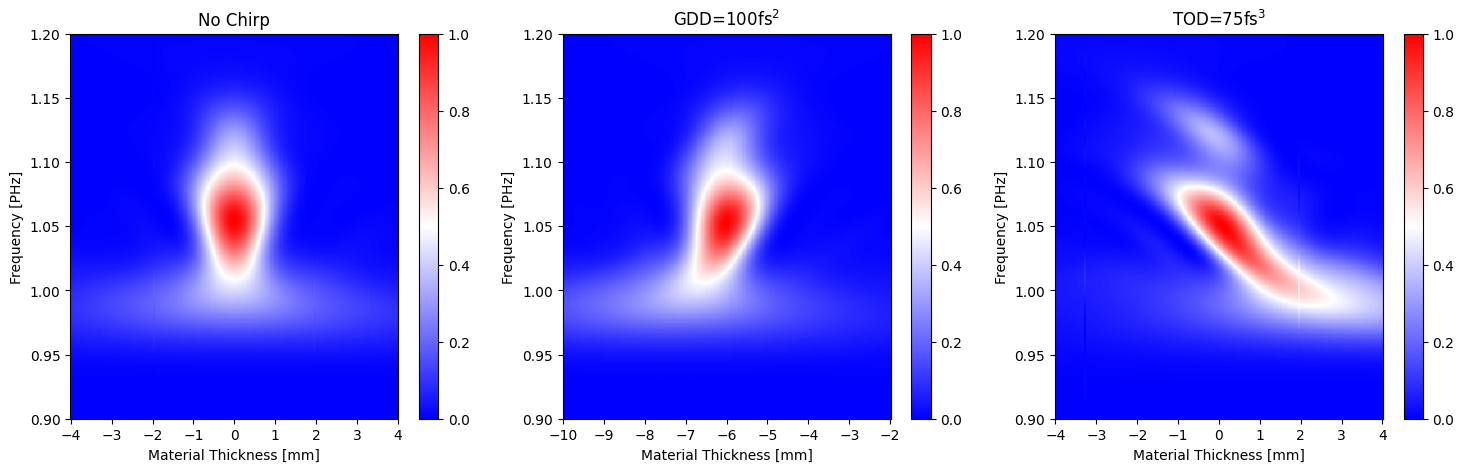

In [ ]:
fig = plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.pcolormesh(jnp.linspace(-4,4,128*2), frequency, ir_trace_compressed.T, cmap="bwr")
plt.xlabel("Material Thickness [mm]")
plt.ylabel("Frequency [PHz]")
plt.title("No Chirp")
plt.colorbar()
plt.xticks([-4,-3,-2,-1,0,1,2,3,4])
plt.ylim(0.9,1.2)

plt.subplot(1,3,2)
plt.pcolormesh(jnp.linspace(-4,4,128*2)-6, frequency, ir_trace_GDD.T, cmap="bwr")
plt.xlabel("Material Thickness [mm]")
plt.ylabel("Frequency [PHz]")
plt.title(r"GDD=$100\mathrm{fs^2}$")
plt.colorbar()
plt.xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2])
plt.ylim(0.9,1.2)

plt.subplot(1,3,3)
plt.pcolormesh(jnp.linspace(-4,4,128*2), frequency, ir_trace_TOD.T, cmap="bwr")
plt.xlabel("Material Thickness [mm]")
plt.ylabel("Frequency [PHz]")
plt.title(r"TOD=$75\mathrm{fs^3}$")
plt.colorbar()
plt.xticks([-4,-3,-2,-1,0,1,2,3,4])
plt.ylim(0.9,1.2)


plt.savefig("dscan_sim_nir_bwr.png", dpi=500)